In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
pd.options.display.max_rows=350
pd.options.display.max_columns=40


# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import imageio
from PIL import Image
from io import BytesIO 
from matplotlib import pyplot as plt


from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1000 = pd.read_csv('df_1000final.csv')
df60=pd.read_csv('descriptionsdf_FINAL.csv')

In [3]:
df1000.columns

Index(['book_id', 'isbn', 'text_reviews_count', 'is_ebook', 'average_rating',
       'description', 'format', 'publisher', 'num_pages', 'isbn13',
       'publication_year', 'ratings_count', 'title', 'descriptiondetect',
       'titledetect', 'book_id_title', 'author', 'first_name', 'gender',
       'probability'],
      dtype='object')

In [4]:
df60.columns

Index(['book_id', 'isbn', 'text_reviews_count', 'is_ebook', 'average_rating',
       'description', 'format', 'publisher', 'num_pages', 'isbn13',
       'publication_year', 'ratings_count', 'title', 'descriptiondetect',
       'titledetect', 'title_2', 'book_id_str', 'book_id_title'],
      dtype='object')

In [5]:
df1000.sample(3)

book_id        isbn  text_reviews_count  is_ebook  average_rating  \
455   127179  0763622621                 646     False            4.37   
59     13083  0440421705                3176     False            3.81   
88   7825557  0525423346                2432     False            4.04   

                                           description       format  \
455  An affectionate storybook tribute to that trul...  not defined   
59   Unfortunately, Roy's first acquaintance in Flo...    Paperback   
88   In this mischievous and utterly original debut...    Hardcover   

                          publisher  num_pages         isbn13  \
455                      Candlewick        0.0  9780763622626   
59                   Yearling Books      292.0  9780440421702   
88   Dutton Books for Young Readers      256.0  9780525423348   

     publication_year  ratings_count  \
455              2006           7243   
59               2006          77177   
88               2010          15549   

                                             title  \
455                                   Library Lion   
59                                            Hoot   
88   A Tale Dark & Grimm (A Tale Dark & Grimm, #1)   

                                     descriptiondetect  \
455  an affectionate storybook tribute to that trul...   
59   unfortunately, roy's first acquaintance in flo...   
88   in this mischievous and utterly original debut...   

                                       titledetect  \
455                                   library lion   
59                                            hoot   
88   a tale dark & grimm (a tale dark & grimm, #1)   

                                         book_id_title        author  \
455                           11737306.One_Cool_Friend   Toni Buzzeo   
59                                          13083.Hoot  Carl Hiaasen   
88   7825557.A_Tale_Dark_&_Grimm_(A_Tale_Dark_&_Gri...  Adam Gidwitz   

    first_name gender  probability  
455       Toni   male         0.94  
59        Carl   male         0.98  
88        Adam   male         0.98

In [6]:
df60.head(3)

book_id        isbn  text_reviews_count  is_ebook  average_rating  \
0      3636  0385732554               49850     False            4.12   
1  11387515  0375869026               31536     False            4.43   
2         5  043965548X               28561     False            4.53   

                                         description                 format  \
0  Twelve-year-old Jonas lives in a seemingly ide...              Paperback   
1  I won't describe what I look like. Whatever yo...              Hardcover   
2  Harry Potter's third year at Hogwarts is full ...  Mass Market Paperback   

    publisher  num_pages         isbn13  publication_year  ratings_count  \
0       Ember      208.0  9780385732550              2006        1311422   
1       Knopf      316.0  9780375869020              2012         255461   
2  Scholastic      435.0  9780439655484              2004        1876252   

                                               title  \
0                          The Giver (The Giver, #1)   
1                                 Wonder (Wonder #1)   
2  Harry Potter and the Prisoner of Azkaban (Harr...   

                                   descriptiondetect  \
0  twelve-year-old jonas lives in a seemingly ide...   
1  i won't describe what i look like. whatever yo...   
2  harry potter's third year at hogwarts is full ...   

                                         titledetect  \
0                          the giver (the giver, #1)   
1                                 wonder (wonder #1)   
2  harry potter and the prisoner of azkaban (harr...   

                                             title_2  book_id_str  \
0                          The_Giver_(The_Giver,_#1)         3636   
1                                 Wonder_(Wonder_#1)     11387515   
2  Harry_Potter_and_the_Prisoner_of_Azkaban_(Harr...            5   

                                       book_id_title  
0                     3636.The_Giver_(The_Giver,_#1)  
1                        11387515.Wonder_(Wonder_#1)  
2  5.Harry_Potter_and_the_Prisoner_of_Azkaban_(Ha...

# ANALYSIS OF THE DESCRIPTIONS 

## FIRST ANALYSIS OF THE DATASETS

Columns to analyse for the df1000: is_ebook, text_reviews_count,average_rating, publisher, publication year, author, gender.

Columns to analyse for the df60= is_ebook, average_rating, text_reviews_count, ratings_count, publisher, publication_year

### ANALYSIS OF THE PUBLICATION YEARS

In [7]:
df1000.publication_year.describe()

count    1000.000000
mean     2004.902000
std        10.203063
min      1907.000000
25%      2001.000000
50%      2007.000000
75%      2012.000000
max      2017.000000
Name: publication_year, dtype: float64

In [8]:
df60.publication_year.describe()

count    60004.000000
mean      2005.512582
std         10.217472
min       1899.000000
25%       2001.000000
50%       2008.000000
75%       2013.000000
max       2018.000000
Name: publication_year, dtype: float64

In [9]:
df1000.publication_year.value_counts().head(5)

2013    64
2012    60
2010    59
2007    56
2014    54
Name: publication_year, dtype: int64

In [10]:
df60.publication_year.value_counts().head(5)

2013    3754
2014    3751
2015    3528
2012    3425
2016    3320
Name: publication_year, dtype: int64

### Grouping the publication years by decades

#### For the df1000

In [11]:
# create a list of our conditions
conditions = [
    (df1000['publication_year'] <= 1909),
    (df1000['publication_year'] > 1909) & (df1000['publication_year'] <= 1919),
    (df1000['publication_year'] > 1919) & (df1000['publication_year'] <= 1929),
    (df1000['publication_year'] > 1929) & (df1000['publication_year'] <= 1939),
    (df1000['publication_year'] > 1939) & (df1000['publication_year'] <= 1949),
    (df1000['publication_year'] > 1949) & (df1000['publication_year'] <= 1959),
    (df1000['publication_year'] > 1959) & (df1000['publication_year'] <= 1969),
    (df1000['publication_year'] > 1969) & (df1000['publication_year'] <= 1979),
    (df1000['publication_year'] > 1979) & (df1000['publication_year'] <= 1989),
    (df1000['publication_year'] > 1989) & (df1000['publication_year'] <= 1999),
    (df1000['publication_year'] > 1999) & (df1000['publication_year'] <= 2009),
    (df1000['publication_year'] > 2009) 
    ]

# create a list of the values we want to assign for each condition
values = ['a-XX 00s','b-XX 10s', 'c-XX 20s', 'd-XX 30s', 'e-XX 40s', 'f-XX 50s','g-XX 60s', 'h-XX 70s', 'i-XX 80s', 'j-XX 90s', 'k-XXI 00s', 'l-XXI 10s']

# create a new column and use np.select to assign values to it using our lists as arguments
df1000['decades'] = np.select(conditions, values)

# display updated DataFrame
df1000.head()

book_id        isbn  text_reviews_count  is_ebook  average_rating  \
0      3636  0385732554               49850     False            4.12   
1  11387515  0375869026               31536     False            4.43   
2         5  043965548X               28561     False            4.53   
3    157993  0156012197               16639     False            4.28   
4     38709  0439244196               14851     False            3.93   

                                         description                 format  \
0  Twelve-year-old Jonas lives in a seemingly ide...              Paperback   
1  I won't describe what I look like. Whatever yo...              Hardcover   
2  Harry Potter's third year at Hogwarts is full ...  Mass Market Paperback   
3  Moral allegory and spiritual autobiography, Th...              Paperback   
4  Stanley tries to dig up the truth in this inve...              Paperback   

        publisher  num_pages         isbn13  publication_year  ratings_count  \
0           Ember      208.0  9780385732550              2006        1311422   
1           Knopf      316.0  9780375869020              2012         255461   
2      Scholastic      435.0  9780439655484              2004        1876252   
3  Harcourt, Inc.       93.0  9780156012195              2000         763309   
4      Scholastic      233.0  9780439244190              2000         766680   

                                               title  \
0                          The Giver (The Giver, #1)   
1                                 Wonder (Wonder #1)   
2  Harry Potter and the Prisoner of Azkaban (Harr...   
3                                  The Little Prince   
4                                  Holes (Holes, #1)   

                                   descriptiondetect  \
0  twelve-year-old jonas lives in a seemingly ide...   
1  i won't describe what i look like. whatever yo...   
2  harry potter's third year at hogwarts is full ...   
3  moral allegory and spiritual autobiography, th...   
4  stanley tries to dig up the truth in this inve...   

                                         titledetect  \
0                          the giver (the giver, #1)   
1                                 wonder (wonder #1)   
2  harry potter and the prisoner of azkaban (harr...   
3                                  the little prince   
4                                  holes (holes, #1)   

                                       book_id_title  \
0                     3636.The_Giver_(The_Giver,_#1)   
1                        11387515.Wonder_(Wonder_#1)   
2  5.Harry_Potter_and_the_Prisoner_of_Azkaban_(Ha...   
3                           157993.The_Little_Prince   
4                            38709.Holes_(Holes,_#1)   

                     author first_name  gender  probability    decades  
0                Lois Lowry       Lois  female         0.58  k-XXI 00s  
1              R.J. Palacio       R.J.  female         0.00  l-XXI 10s  
2              J.K. Rowling       J.K.  female         0.00  k-XXI 00s  
3  Antoine de Saint-Exupéry    Antoine    male         0.99  k-XXI 00s  
4              Louis Sachar      Louis    male         0.97  k-XXI 00s

In [12]:
#!pip install xlsxwriter

In [13]:
df1000.to_excel("df1000tab.xlsx",engine='xlsxwriter') # saving it for use it on tableau

#### for the df60

In [14]:
# create a list of our conditions
conditions2 = [
    (df60['publication_year'] <= 1909),
    (df60['publication_year'] > 1909) & (df60['publication_year'] <= 1919),
    (df60['publication_year'] > 1919) & (df60['publication_year'] <= 1929),
    (df60['publication_year'] > 1929) & (df60['publication_year'] <= 1939),
    (df60['publication_year'] > 1939) & (df60['publication_year'] <= 1949),
    (df60['publication_year'] > 1949) & (df60['publication_year'] <= 1959),
    (df60['publication_year'] > 1959) & (df60['publication_year'] <= 1969),
    (df60['publication_year'] > 1969) & (df60['publication_year'] <= 1979),
    (df60['publication_year'] > 1979) & (df60['publication_year'] <= 1989),
    (df60['publication_year'] > 1989) & (df60['publication_year'] <= 1999),
    (df60['publication_year'] > 1999) & (df60['publication_year'] <= 2009),
    (df60['publication_year'] > 2009) 
    ]

# create a list of the values we want to assign for each condition
values2 = ['XIX-XX 00s','XX 10s', 'XX 20s', 'XX 30s', 'XX 40s', 'XX 50s','XX 60s', 'XX 70s', 'XX 80s', 'XX 90s', 'XXI 00s', 'XXI 10s']

# create a new column and use np.select to assign values to it using our lists as arguments
df60['decades'] = np.select(conditions2, values2)

# display updated DataFrame
df60.head()

book_id        isbn  text_reviews_count  is_ebook  average_rating  \
0      3636  0385732554               49850     False            4.12   
1  11387515  0375869026               31536     False            4.43   
2         5  043965548X               28561     False            4.53   
3    157993  0156012197               16639     False            4.28   
4     38709  0439244196               14851     False            3.93   

                                         description                 format  \
0  Twelve-year-old Jonas lives in a seemingly ide...              Paperback   
1  I won't describe what I look like. Whatever yo...              Hardcover   
2  Harry Potter's third year at Hogwarts is full ...  Mass Market Paperback   
3  Moral allegory and spiritual autobiography, Th...              Paperback   
4  Stanley tries to dig up the truth in this inve...              Paperback   

        publisher  num_pages         isbn13  publication_year  ratings_count  \
0           Ember      208.0  9780385732550              2006        1311422   
1           Knopf      316.0  9780375869020              2012         255461   
2      Scholastic      435.0  9780439655484              2004        1876252   
3  Harcourt, Inc.       93.0  9780156012195              2000         763309   
4      Scholastic      233.0  9780439244190              2000         766680   

                                               title  \
0                          The Giver (The Giver, #1)   
1                                 Wonder (Wonder #1)   
2  Harry Potter and the Prisoner of Azkaban (Harr...   
3                                  The Little Prince   
4                                  Holes (Holes, #1)   

                                   descriptiondetect  \
0  twelve-year-old jonas lives in a seemingly ide...   
1  i won't describe what i look like. whatever yo...   
2  harry potter's third year at hogwarts is full ...   
3  moral allegory and spiritual autobiography, th...   
4  stanley tries to dig up the truth in this inve...   

                                         titledetect  \
0                          the giver (the giver, #1)   
1                                 wonder (wonder #1)   
2  harry potter and the prisoner of azkaban (harr...   
3                                  the little prince   
4                                  holes (holes, #1)   

                                             title_2  book_id_str  \
0                          The_Giver_(The_Giver,_#1)         3636   
1                                 Wonder_(Wonder_#1)     11387515   
2  Harry_Potter_and_the_Prisoner_of_Azkaban_(Harr...            5   
3                                  The_Little_Prince       157993   
4                                  Holes_(Holes,_#1)        38709   

                                       book_id_title  decades  
0                     3636.The_Giver_(The_Giver,_#1)  XXI 00s  
1                        11387515.Wonder_(Wonder_#1)  XXI 10s  
2  5.Harry_Potter_and_the_Prisoner_of_Azkaban_(Ha...  XXI 00s  
3                           157993.The_Little_Prince  XXI 00s  
4                            38709.Holes_(Holes,_#1)  XXI 00s

In [15]:
df60.to_excel("df60tab.xlsx",engine='xlsxwriter') # Saving it to use it on tableau

In [16]:
df1000.decades.value_counts()

k-XXI 00s    428
l-XXI 10s    380
j-XX 90s     128
i-XX 80s      47
h-XX 70s       4
f-XX 50s       4
g-XX 60s       4
d-XX 30s       2
e-XX 40s       2
a-XX 00s       1
Name: decades, dtype: int64

In [17]:
df60.decades.value_counts()

XXI 10s       25993
XXI 00s       20915
XX 90s         9104
XX 80s         2560
XX 70s          862
XX 60s          333
XX 50s          110
XX 40s           57
XX 30s           36
XIX-XX 00s       19
XX 20s           14
XX 10s            1
Name: decades, dtype: int64

In [18]:
freq_years = df60['decades'].value_counts()
freq_years

XXI 10s       25993
XXI 00s       20915
XX 90s         9104
XX 80s         2560
XX 70s          862
XX 60s          333
XX 50s          110
XX 40s           57
XX 30s           36
XIX-XX 00s       19
XX 20s           14
XX 10s            1
Name: decades, dtype: int64

In [19]:
freq_years = freq_years.reset_index()
freq_years

index  decades
0      XXI 10s    25993
1      XXI 00s    20915
2       XX 90s     9104
3       XX 80s     2560
4       XX 70s      862
5       XX 60s      333
6       XX 50s      110
7       XX 40s       57
8       XX 30s       36
9   XIX-XX 00s       19
10      XX 20s       14
11      XX 10s        1

In [20]:
freq_years.columns = ['index', 'decades']
freq_years

index  decades
0      XXI 10s    25993
1      XXI 00s    20915
2       XX 90s     9104
3       XX 80s     2560
4       XX 70s      862
5       XX 60s      333
6       XX 50s      110
7       XX 40s       57
8       XX 30s       36
9   XIX-XX 00s       19
10      XX 20s       14
11      XX 10s        1

In [21]:
labels = ['XX 00s','XX 10s', 'XX 20s', 'XX 30s', 'XX 40s', 'XX 50s','XX 60s', 'XX 70s', 'XX 80s', 'XX 90s', 'XXI 00s', 'XXI 10s']
labels

['XX 00s',
 'XX 10s',
 'XX 20s',
 'XX 30s',
 'XX 40s',
 'XX 50s',
 'XX 60s',
 'XX 70s',
 'XX 80s',
 'XX 90s',
 'XXI 00s',
 'XXI 10s']

In [22]:
colors = ['DarkSeaGreen', 'LightCoral','AliceBlue', 'SandyBrown', 'LightSalmon']
colors

['DarkSeaGreen', 'LightCoral', 'AliceBlue', 'SandyBrown', 'LightSalmon']

In [23]:
fig = px.pie(freq_years, values = 'decades', 
                  color= 'index', names = labels,
             color_discrete_sequence = colors)

fig.update_layout(title= 'Distribution of books by decade in the complete dataset')

fig.show()

### ANALYSIS OF THE IS_EBOOK

#### for the df1000

In [24]:
df1000.is_ebook.value_counts()

False    993
True       7
Name: is_ebook, dtype: int64

In [25]:
labels=['Ebook', 'Not ebook']
values=[7,993]
fig=go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.show()

### for the df60

In [26]:
df60.is_ebook.value_counts()

False    59032
True       972
Name: is_ebook, dtype: int64

In [27]:
labels=['Ebook', 'Not ebook']
values=[972,59032]
fig=go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.show()

### ANALYSIS OF THE PUBLISHERS

#### for the df1000

In [28]:
df1000.publisher.describe()

count              1000
unique              246
top       HarperCollins
freq                 96
Name: publisher, dtype: object

In [29]:
df1000.publisher.value_counts().head(50)

HarperCollins                                 96
Scholastic                                    80
HMH Books for Young Readers                   52
Puffin Books                                  46
Disney-Hyperion                               36
Little, Brown Books for Young Readers         35
Candlewick                                    27
Atheneum Books for Young Readers              24
Aladdin                                       22
Greenwillow Books                             21
Simon  Schuster Books for Young Readers       18
Chronicle Books                               18
Random House Books for Young Readers          17
Knopf                                         16
Balzer + Bray                                 14
Dial Books                                    13
Amulet Books                                  13
Clarion Books                                 13
Yearling                                      13
HarperTrophy                                  12
Philomel Books      

#### for the df60

In [30]:
df60.publisher.describe()

count          60004
unique          5234
top       Scholastic
freq            3349
Name: publisher, dtype: object

In [31]:
df60.publisher.value_counts().head(50)

Scholastic                                     3349
HarperCollins                                  2640
HMH Books for Young Readers                    1882
Puffin Books                                   1509
Candlewick                                     1439
Random House Books for Young Readers           1345
Holiday House                                   699
Greenwillow Books                               676
Little, Brown Books for Young Readers           619
not defined                                     603
Aladdin                                         603
Chronicle Books                                 597
Henry Holt and Co. (BYR)                        537
Grosset & Dunlap                                467
Knopf                                           462
Yearling                                        455
Harry N. Abrams                                 444
Disney-Hyperion                                 439
Turtleback Books                                427
Farrar, Stra

### ANALYSIS OF THE AVERAGE RATING PER BOOK

#### for the df1000

In [32]:
df1000.average_rating.describe()

count    1000.000000
mean        4.088450
std         0.196793
min         3.290000
25%         3.957500
50%         4.090000
75%         4.220000
max         4.750000
Name: average_rating, dtype: float64

#### for the df60

In [33]:
df60.average_rating.describe()

count    60004.000000
mean         3.876111
std          0.373095
min          1.000000
25%          3.660000
50%          3.900000
75%          4.120000
max          5.000000
Name: average_rating, dtype: float64

### ANALYSIS OF THE GENDER

In [34]:
df1000.author.nunique()

554

In [35]:
freq_gender = df1000['gender'].value_counts()
freq_gender

male      513
female    487
Name: gender, dtype: int64

In [36]:
freq_gender = freq_gender.reset_index(name='count')
freq_gender

index  count
0    male    513
1  female    487

In [37]:
freq_gender.columns = ['Gender', 'count']
freq_gender

Gender  count
0    male    513
1  female    487

In [38]:
colors2 = ['#a7c6ed','#ecc947']
colors2

['#a7c6ed', '#ecc947']

In [39]:
labels = ['Male', 'Female']
labels

['Male', 'Female']

In [40]:
fig = px.pie(freq_gender, values = 'count', 
                  color= 'Gender', names = labels,
             color_discrete_sequence = colors2)

fig.update_layout(title= 'Distribution of gender in the 1000 books sample')

fig.show()


## SECOND ANALYSIS OF THE DATASETS: DESCRIPTIONS

### Which are the most common words in the df60 dataset?

In [41]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,
    remove links,remove punctuation
    and remove words containing numbers.'''
    
    #text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) #words --> 
    return text

In [42]:
# text preprocessing function
def text_preprocessing(text):
    """
    Cleaning and parsing the text.
    
    """
    from nltk.corpus import stopwords
    
    # Tokenize the text
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    # Lower case and remove punctuations
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    
    # Remove stopwords
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

In [ ]:
# DON'T RUN THE CODE BELOW IF YOU ARE IN A HURRY, IMPORT df60wordclouds.csv instead.

In [43]:
df60=pd.read_csv('df60wordclouds.csv')

In [44]:
all_words_clean = df60['description_clean'].str.split(expand=True).unstack().value_counts()

In [45]:
px.bar(all_words_clean, x = all_words_clean.index[:20],
      y = all_words_clean.values[:20], 
       color = all_words_clean.values[:20],
      title = 'Top 20 word frequencies in the dataset',
      labels=dict(x='Words', y='Frequency')) # Give some label on the different axes

#### b) ..and for each decade?

In [46]:
df60.decades.value_counts()

XXI 10s       25993
XXI 00s       20915
XX 90s         9104
XX 80s         2560
XX 70s          862
XX 60s          333
XX 50s          110
XX 40s           57
XX 30s           36
XIX-XX 00s       19
XX 20s           14
XX 10s            1
Name: decades, dtype: int64

In [47]:
begxx_thirties=df60[(df60.decades == 'XIX-XX 00s') | (df60.decades == 'XX 10s') | (df60.decades == 'XX 20s') | (df60.decades == 'XX 30s')]
forties_fifties=df60[(df60.decades == 'XX 40s') | (df60.decades == 'XX 50s')]
sixties_seventies=df60[(df60.decades == 'XX 60s') | (df60.decades == 'XX 70s')]
eighties_ninetees = df60[(df60.decades == 'XX 80s')|(df60.decades == 'XX 90s')]
newmillenium= df60[df60.decades == 'XXI 00s']
lastdecade=df60[df60.decades == 'XXI 10s']

In [48]:
begxx_thirties_words=begxx_thirties['description_clean'].str.split(expand=True).unstack().value_counts()
forties_fifties_words=forties_fifties['description_clean'].str.split(expand=True).unstack().value_counts()
sixties_seventies_words=sixties_seventies['description_clean'].str.split(expand=True).unstack().value_counts()
eighties_ninetees_words=eighties_ninetees['description_clean'].str.split(expand=True).unstack().value_counts()
newmillenium_words=newmillenium['description_clean'].str.split(expand=True).unstack().value_counts()
lastdecade_words=lastdecade['description_clean'].str.split(expand=True).unstack().value_counts()

In [49]:
px.bar(begxx_thirties_words, x = begxx_thirties_words.index[:50],
      y = begxx_thirties_words.values[:50], 
       color = begxx_thirties_words.values[:50],
      title = ' Beginning of S.XX-Thirties - Top 50 word frequencies in the dataset',
      labels=dict(x='Words', y='Frequency')) # Give some label on the different axes

In [50]:
px.bar(forties_fifties_words, x = forties_fifties_words.index[:50],
      y = forties_fifties_words.values[:50], 
       color = forties_fifties_words.values[:50],
      title = 'Forties and fifties - Top 50 word frequencies in the dataset',
      labels=dict(x='Words', y='Frequency')) # Give some label on the different axes

In [51]:
px.bar(sixties_seventies_words, x = sixties_seventies_words.index[:50],
      y = sixties_seventies_words.values[:50], 
       color = sixties_seventies_words.values[:50],
      title = 'Sixties and seventies - Top 50 word frequencies in the dataset',
      labels=dict(x='Words', y='Frequency')) # Give some label on the different axes

In [52]:
px.bar(eighties_ninetees_words, x = eighties_ninetees_words.index[:50],
      y = eighties_ninetees_words.values[:50], 
       color = eighties_ninetees_words.values[:50],
      title = 'Eighties and Ninetees - Top 50 word frequencies in the dataset',
      labels=dict(x='Words', y='Frequency')) # Give some label on the different axes

In [53]:
px.bar(newmillenium_words, x = newmillenium_words.index[:50],
      y = newmillenium_words.values[:50], 
       color = newmillenium_words.values[:50],
      title = '2000s decade - Top 50 word frequencies in the dataset',
      labels=dict(x='Words', y='Frequency')) # Give some label on the different axes

In [54]:
px.bar(lastdecade_words, x = lastdecade_words.index[:50],
      y = lastdecade_words.values[:50], 
       color = lastdecade_words.values[:50],
      title = '2010s decade - Top 50 word frequencies in the dataset',
      labels=dict(x='Words', y='Frequency')) # Give some label on the different axes

####  WordClouds

In [55]:
begxx_thirties_=begxx_thirties['description_clean'].values
forties_fifties_=forties_fifties['description_clean'].values
sixties_seventies_=sixties_seventies['description_clean'].values
eighties_ninetees_=eighties_ninetees['description_clean'].values
newmillenium_=newmillenium['description_clean'].values
lastdecade_=lastdecade['description_clean'].values

##### Creating the list of stopwords

In [56]:
stop_words = ['story', 'stories',"book", 'books','published','edition','editions','tale', 'tales', "books", "children",
              'childrens', 'little','kid','kids', 'child', 'young', 'old', 'read','reading','reader','readers', 'illustrated', 
              'pictures', 'illustrations', 'picture', 'first', 'one', 'new', 'written','come', 'must', 'another', 
              'make', 'makes', 'even','take', 'takes', 'get', 'gets', 'come', 'comes', 'would','since','around', 
              'text','finally', 'always', 'never', 'although', 'ever', 'like', 'reading', 'two', 
              'three', 'many', 'collection', 'series', 'day', 'also', 'every','author', 'fullcolor','cant',
             'finds', 'doesnt', 'much', 'something', 'along', 'way', 'serie', 'things', 'must', 'full'] + list(STOPWORDS)

##### Creating the masks

In [78]:
#change the paths
xx_30s = np.array(Image.open('../GIT/PROJECT 1 BOOK RECOMMENDER/masks/crown.jpg'))
_40s_50s = np.array(Image.open('../GIT/PROJECT 1 BOOK RECOMMENDER/masks/FAMILY.jpg'))
_60s_70s = np.array(Image.open('../GIT/PROJECT 1 BOOK RECOMMENDER/masks/LUPA.jpg'))
_80s_90s = np.array(Image.open('../GIT/PROJECT 1 BOOK RECOMMENDER/masks/GIRL.jpg'))
_2000s=np.array(Image.open('../GIT/PROJECT 1 BOOK RECOMMENDER/masks/WORLD.jpg'))
_2010s=np.array(Image.open('../GIT/PROJECT 1 BOOK RECOMMENDER/masks/HELP.jpg'))


##### Creating the wordclouds

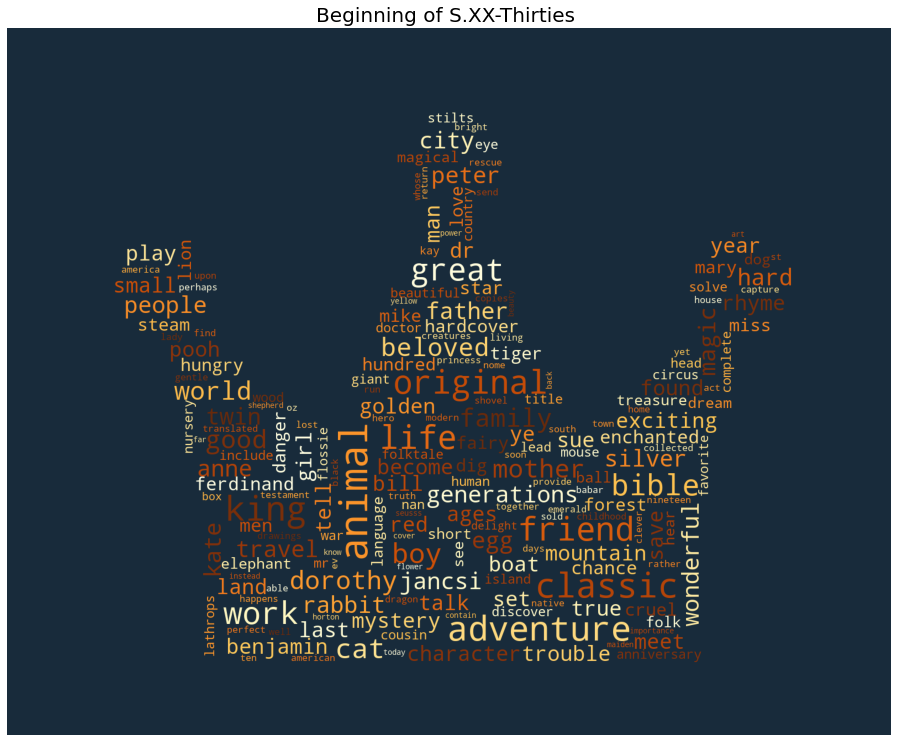

In [63]:
# The wordcloud of Beginning of S.XX-Thirties
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#132637", max_words=200, 
               mask=xx_30s, 
               stopwords=stop_words, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(begxx_thirties_))
plt.title("Beginning of S.XX-Thirties ", fontsize=20)
plt.imshow(wc.recolor( colormap= 'YlOrBr' , random_state=17), alpha=0.98)
plt.axis('off')
plt.savefig('1-jpeg')

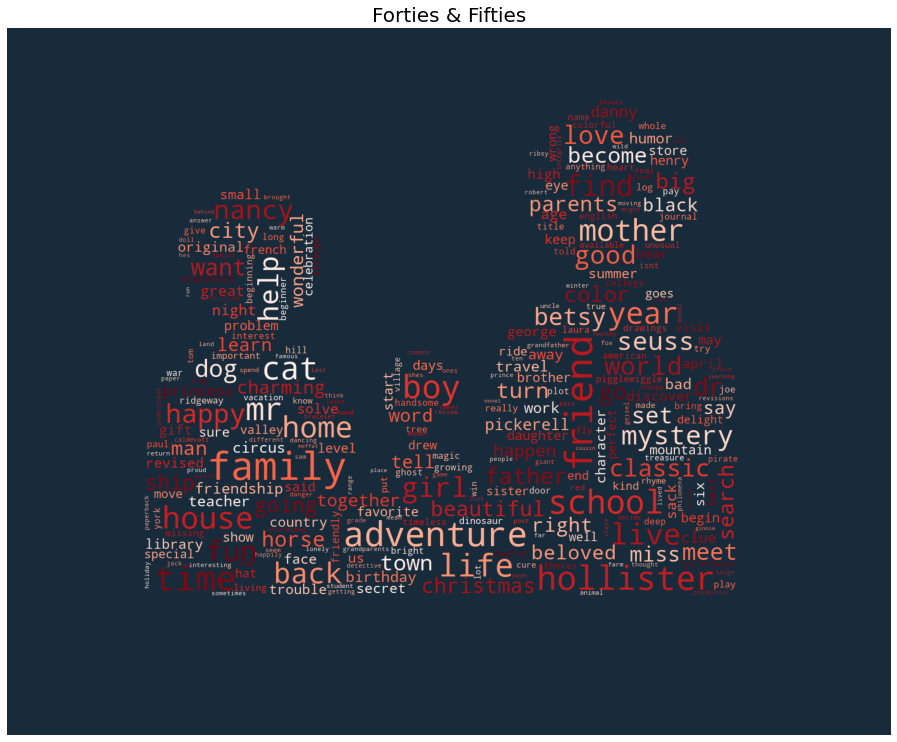

In [64]:
# The wordcloud of Forties & Fifties
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#132637", max_words=300, 
               mask=_40s_50s , 
               stopwords=stop_words, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(forties_fifties_))
plt.title("Forties & Fifties", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Reds' , random_state=17), alpha=0.98)
plt.axis('off')
plt.savefig('2-jpeg')

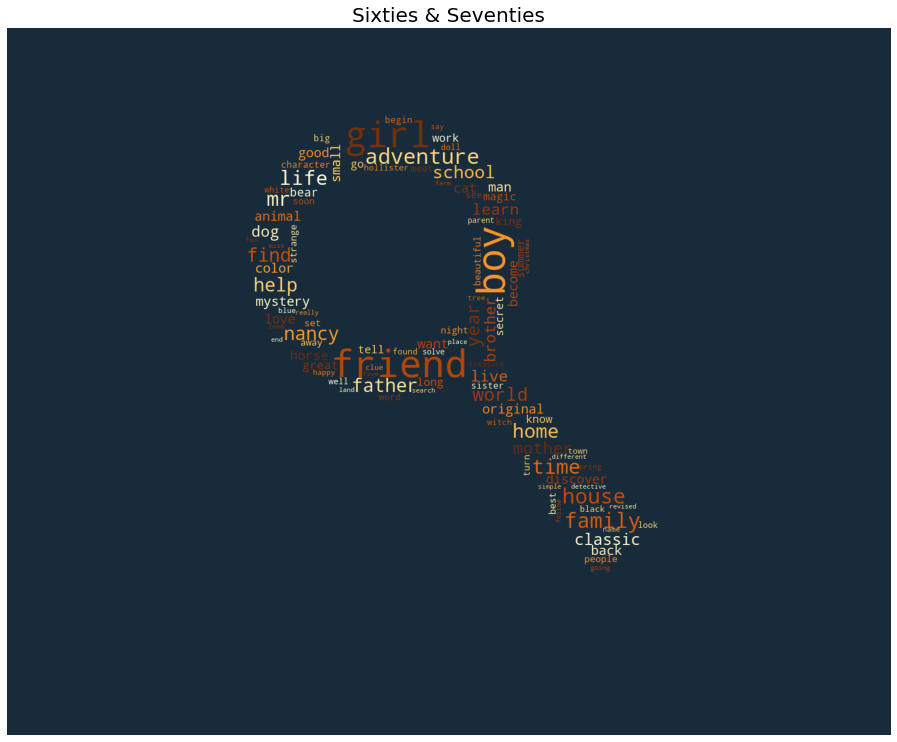

In [65]:
# The wordcloud of Sixties & Seventies
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#132637", max_words=100, 
               mask=_60s_70s, 
               stopwords=stop_words, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(sixties_seventies_))
plt.title("Sixties & Seventies", fontsize=20)
plt.imshow(wc.recolor( colormap= 'YlOrBr' , random_state=17), alpha=0.98)
plt.axis('off')
plt.savefig('3-jpeg')

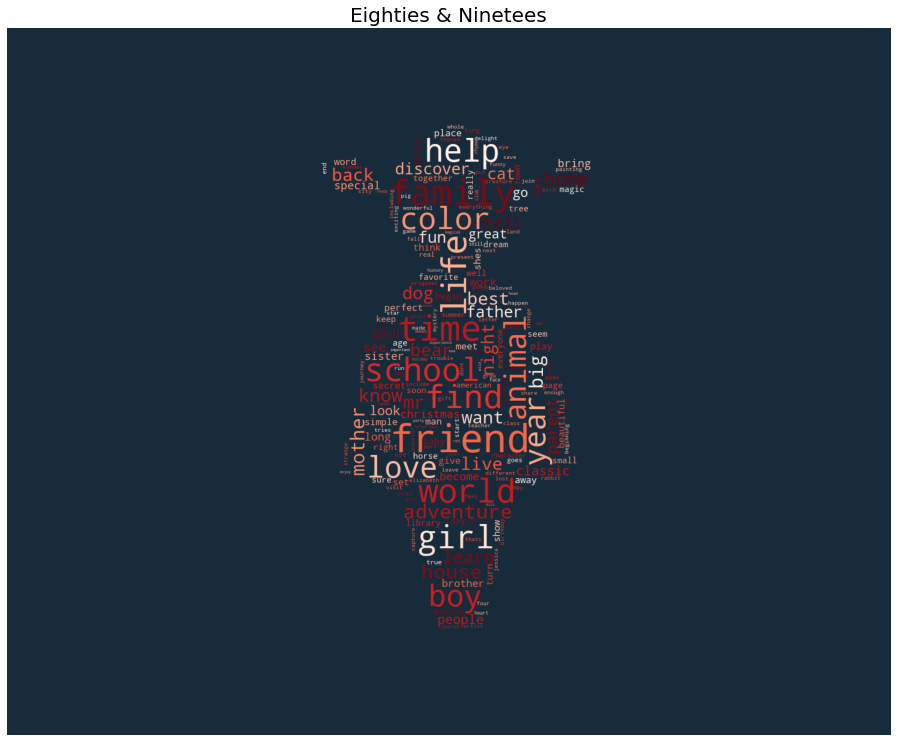

In [66]:
# The wordcloud of Eighties & Ninetees
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#132637", max_words=200, 
               mask=_80s_90s, 
               stopwords=stop_words, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(eighties_ninetees_))
plt.title("Eighties & Ninetees", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Reds' , random_state=17), alpha=0.98)
plt.axis('off')
plt.savefig('4-jpeg')

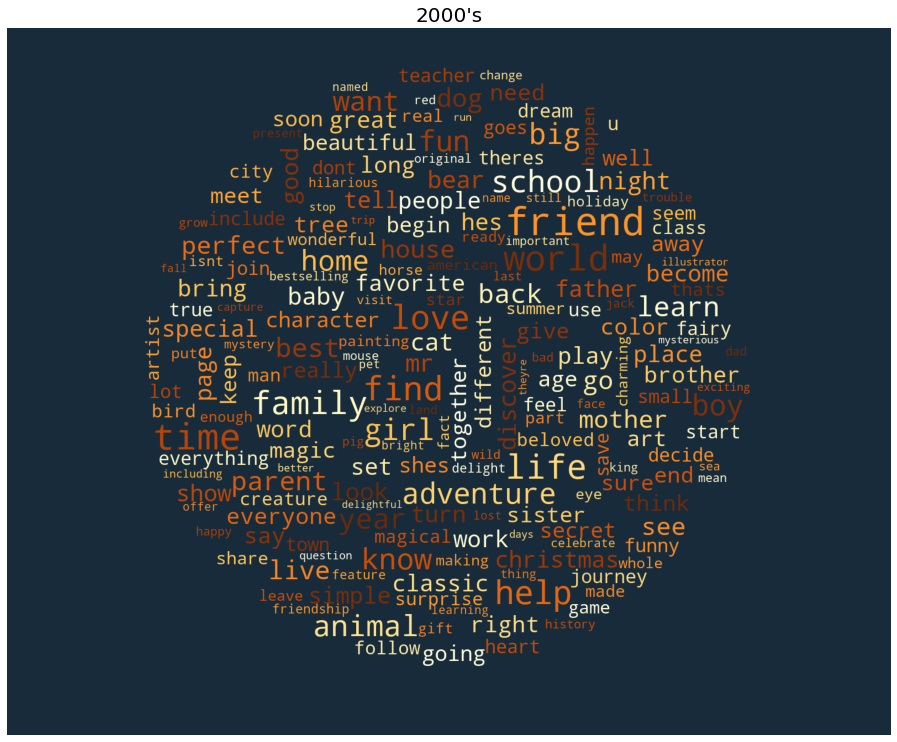

In [67]:
# The wordcloud of 2000's
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#132637", max_words=200, 
               mask=_2000s, 
               stopwords=stop_words, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(newmillenium_))
plt.title("2000's", fontsize=20)
plt.imshow(wc.recolor( colormap= 'YlOrBr' , random_state=17), alpha=0.98)
plt.axis('off')
plt.savefig('5-jpeg')

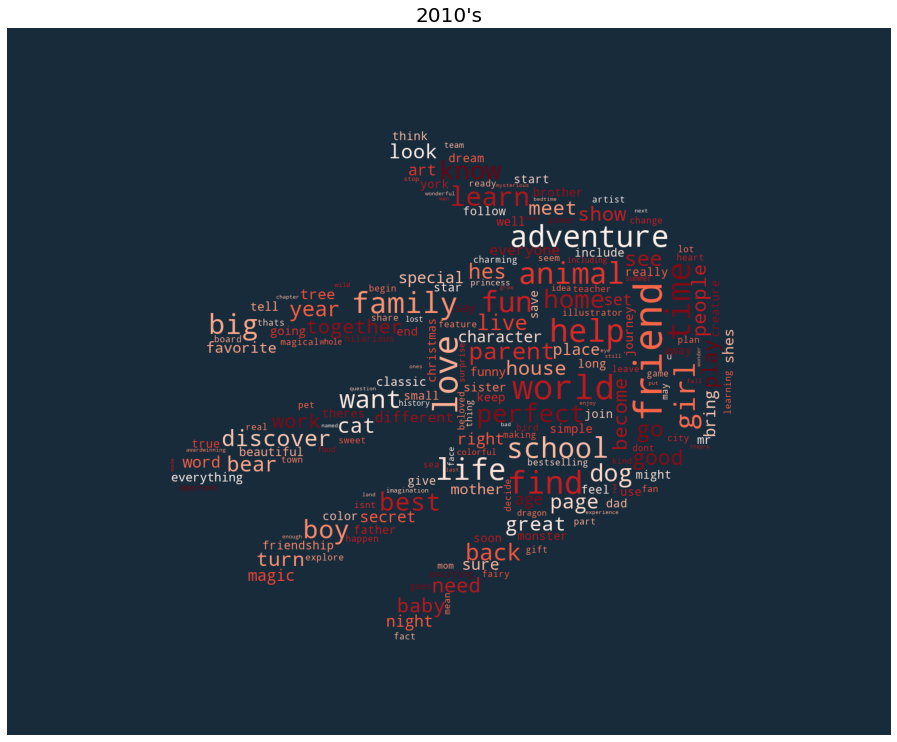

In [68]:
# The wordcloud of 2010's
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#132637", max_words=200, 
               mask=_2010s, 
               stopwords=stop_words, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(lastdecade_))
plt.title("2010's", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Reds' , random_state=17), alpha=0.98)
plt.axis('off')
plt.savefig('6-jpeg')

### Which are the most common words in the df1000 dataset split by gender?

In [79]:
df1000.columns

Index(['book_id', 'isbn', 'text_reviews_count', 'is_ebook', 'average_rating',
       'description', 'format', 'publisher', 'num_pages', 'isbn13',
       'publication_year', 'ratings_count', 'title', 'descriptiondetect',
       'titledetect', 'book_id_title', 'author', 'first_name', 'gender',
       'probability', 'decades'],
      dtype='object')

In [80]:
df1000['description_clean'] = df1000['descriptiondetect'].apply(lambda x : text_preprocessing(x))

In [81]:
female=df1000[df1000.gender == 'female']
male=df1000[df1000.gender == 'male']

In [82]:
female_=female['description_clean'].values
male_=male['description_clean'].values

In [83]:
female_words = female['description_clean'].str.split(expand=True).unstack().value_counts()

In [84]:
male_words = male['description_clean'].str.split(expand=True).unstack().value_counts()

In [85]:
female_words.head(50)

new              225
book             198
one              180
story            179
little           117
children         112
life             108
family           104
young            102
world             99
boy               94
like              94
school            94
first             94
readers           93
day               92
home              88
friends           82
find              80
even              78
make              74
books             73
old               70
love              67
never             67
girl              66
house             66
best              64
author            62
time              62
illustrations     61
ever              57
back              57
friend            56
hes               56
two               56
away              56
way               55
come              55
comes             54
mother            53
shes              51
help              51
go                51
father            50
night             50
picture           49
things       

In [86]:
male_words.head(50)

book         293
one          199
story        185
new          180
little       114
first        106
school       101
children     101
time          99
world         98
life          95
even          88
day           87
readers       87
best          86
like          85
find          75
two           71
big           70
young         70
ever          69
family        69
back          69
books         69
get           67
tale          67
way           67
help          66
stories       64
classic       63
boy           62
friends       60
make          60
read          58
things        56
author        56
something     56
comes         56
adventure     56
york          55
girl          54
series        54
every         54
go            53
picture       53
kids          52
home          52
bear          52
going         52
never         51
dtype: int64

In [87]:
px.bar(female_words, x = female_words.index[:50],
      y = female_words.values[:50], 
       color = female_words.values[:50],
      title = 'Female authors - Top 30 word frequencies in the dataset',
      labels=dict(x='Words', y='Frequency')) # Give some label on the different axes

In [88]:
px.bar(male_words, x = male_words.index[:50],
      y = male_words.values[:50], 
       color = male_words.values[:50],
      title = 'Male authors - Top 50 word frequencies in the dataset',
      labels=dict(x='Words', y='Frequency')) # Give some label on the different axes

##### WordClouds to visualise most popular words by gender

In [89]:
female_=female['description_clean'].values
male_=male['description_clean'].values

In [90]:
woman = np.array(Image.open('E:/ALLWOMEN/GIT/PROJECT 1 BOOK RECOMMENDER/masks/WOMAN.jpg')) #change the path
man = np.array(Image.open('E:/ALLWOMEN/GIT/PROJECT 1 BOOK RECOMMENDER/masks/MAN.jpg'))

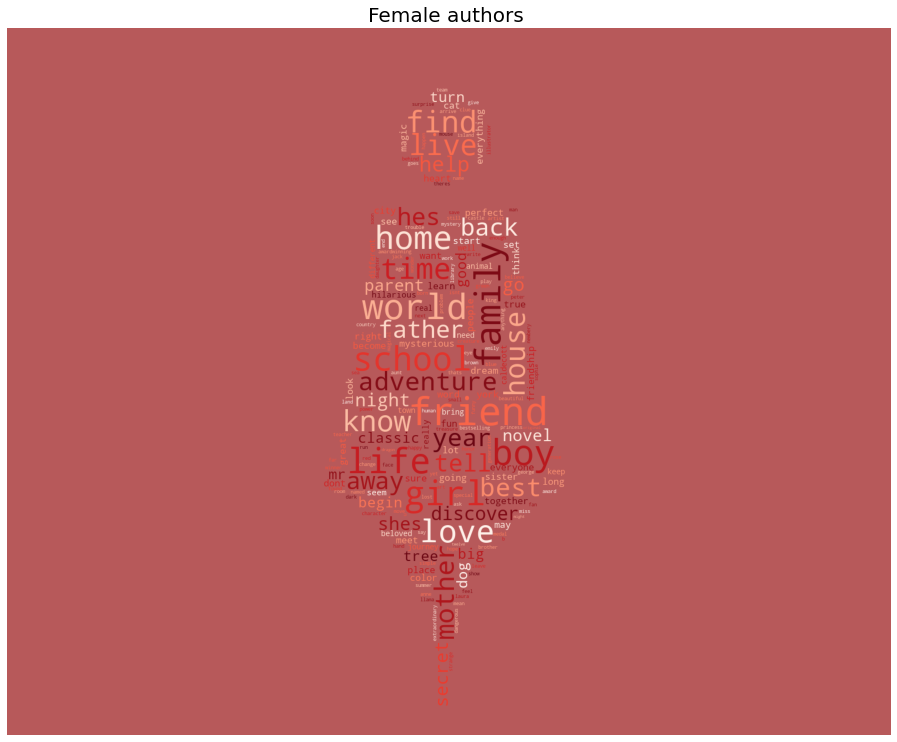

In [91]:
# The wordcloud of female authors
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#b65657", max_words=200, 
               mask=woman, 
               stopwords=stop_words, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(female_))
plt.title("Female authors ", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Reds' , random_state=17), alpha=0.98)
plt.axis('off')
plt.savefig('7-jpeg')

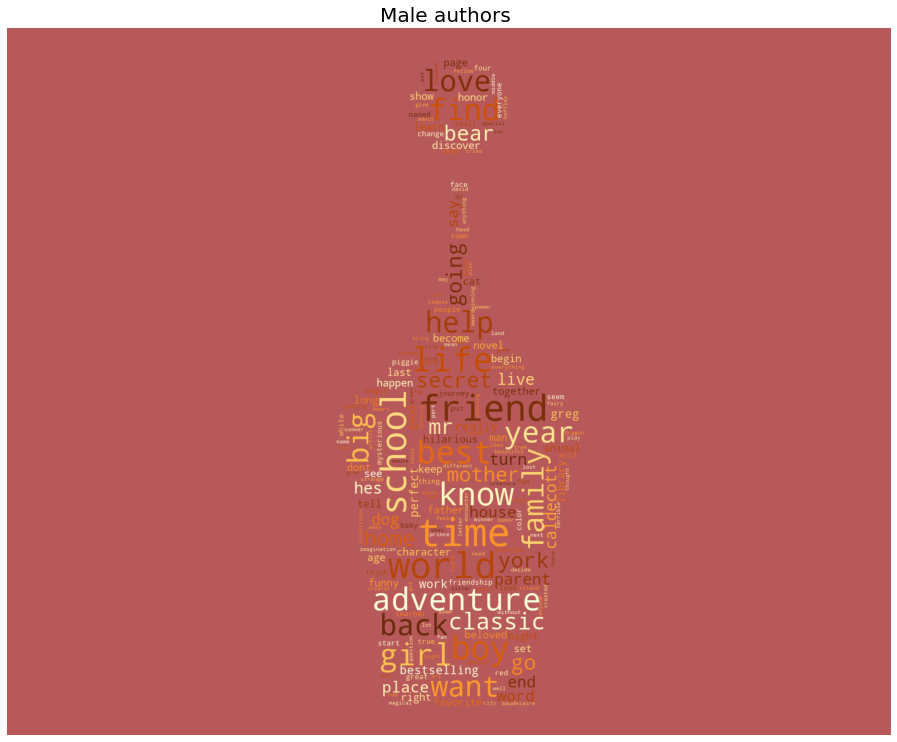

In [92]:
# The wordcloud of male authors
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#b65657", max_words=200, 
               mask=man,
               stopwords=stop_words, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(male_))
plt.title("Male authors ", fontsize=20)
plt.imshow(wc.recolor( colormap= 'YlOrBr' , random_state=17), alpha=0.98)
plt.axis('off')
plt.savefig('8-jpeg')

### TOPIC MODELLING:  Latent Dirichlet Allocation (LDA) gensim

In [93]:
stop_words_topic = ['world', 'friend','family', 'school', 'life', 'time', 'friends', 'house', 'day','story', 'stories',"book", 'books','published','edition','editions','tale', 'tales', "books", "children",
              'childrens', 'little','kid','kids', 'child', 'young', 'old', 'read','reading','reader','readers', 'illustrated', 
              'pictures', 'illustrations', 'picture', 'first', 'one', 'written','come', 'must', 'another', 
              'make', 'makes', 'even','take', 'takes', 'get', 'gets', 'come', 'comes', 'would','since','around', 
              'text','finally', 'always', 'never', 'although', 'ever', 'like', 'reading', 'two', 
              'three', 'many', 'collection', 'series', 'day', 'also', 'every','author', 'fullcolor','cant',
             'finds', 'doesnt', 'much', 'something', 'along', 'way', 'serie', 'things', 'must', 'full'] + list(STOPWORDS)

In [94]:
female_topic = female['description_clean'].tolist()
male_topic= male['description_clean'].tolist()

In [95]:
# prepare the preprocessing
#stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [96]:
# removing stopwords, punctuations and normalizing the corpus
def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop_words_topic])
    punc_free = "".join(token for token in stop_free if token not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

#### Female authors' description topics

In [97]:
fem_clean = [clean(description).split() for description in female_topic]

In [98]:
from gensim import corpora
dictionary = corpora.Dictionary(fem_clean)
corpus = [dictionary.doc2bow(text) for text in fem_clean]

import pickle 
# uncomment the code if working locally
#pickle.dump(corpus, open('data/sentimentData/corpus.pkl', 'wb'))
#dictionary.save('data/sentimentData/dictionary.gensim')

In [99]:
import gensim

# let LDA find 12 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=12, id2word=dictionary, passes=15)

# uncomment the code if working locally
#ldamodel.save('../input/sentimentData/model3.gensim')

topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.013*"new" + 0.005*"piggie" + 0.004*"boy" + 0.004*"best" + 0.004*"b" + 0.004*"find" + 0.003*"gerald" + 0.003*"think"')
(1, '0.011*"boy" + 0.007*"new" + 0.007*"llama" + 0.004*"find" + 0.004*"love" + 0.004*"mama" + 0.004*"problem" + 0.004*"home"')
(2, '0.007*"clue" + 0.006*"secret" + 0.005*"mystery" + 0.005*"twelve" + 0.004*"go" + 0.004*"youre" + 0.003*"find" + 0.003*"big"')
(3, '0.013*"new" + 0.004*"girl" + 0.004*"dog" + 0.004*"country" + 0.004*"year" + 0.003*"love" + 0.003*"laura" + 0.003*"father"')
(4, '0.006*"love" + 0.004*"mother" + 0.004*"he" + 0.004*"girl" + 0.004*"home" + 0.003*"know" + 0.003*"new" + 0.003*"father"')
(5, '0.005*"go" + 0.005*"boy" + 0.005*"peter" + 0.005*"new" + 0.004*"love" + 0.004*"best" + 0.004*"girl" + 0.004*"want"')
(6, '0.005*"new" + 0.004*"novel" + 0.003*"rose" + 0.003*"rain" + 0.003*"review" + 0.003*"award" + 0.003*"best" + 0.003*"sea"')
(7, '0.008*"new" + 0.007*"back" + 0.005*"green" + 0.004*"blue" + 0.004*"girl" + 0.003*"boy" + 0.003*"fun" + 0.003*

#### Male authors' description topics

In [100]:
male_clean = [clean(description).split() for description in male_topic]

In [101]:
from gensim import corpora
dictionary = corpora.Dictionary(male_clean)
corpus = [dictionary.doc2bow(text) for text in male_clean]

import pickle 
# uncomment the code if working locally
#pickle.dump(corpus, open('data/sentimentData/corpus.pkl', 'wb'))
#dictionary.save('data/sentimentData/dictionary.gensim')

In [102]:
import gensim

# let LDA find 12 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=12, id2word=dictionary, passes=15)

# uncomment the code if working locally
#ldamodel.save('../input/sentimentData/model3.gensim')

topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.005*"secret" + 0.005*"know" + 0.005*"back" + 0.004*"new" + 0.003*"boy" + 0.003*"year" + 0.003*"find" + 0.003*"winner"')
(1, '0.004*"bunny" + 0.004*"know" + 0.004*"new" + 0.003*"adventure" + 0.003*"nexttolast" + 0.003*"smell" + 0.003*"dog" + 0.003*"one"')
(2, '0.014*"piggie" + 0.010*"gerald" + 0.006*"help" + 0.005*"best" + 0.005*"boy" + 0.004*"big" + 0.003*"jane" + 0.003*"start"')
(3, '0.009*"new" + 0.005*"end" + 0.005*"year" + 0.004*"best" + 0.004*"mother" + 0.004*"find" + 0.004*"box" + 0.003*"crayon"')
(4, '0.009*"greg" + 0.005*"heffley" + 0.003*"he" + 0.003*"know" + 0.003*"library" + 0.003*"island" + 0.003*"character" + 0.003*"girl"')
(5, '0.007*"baudelaire" + 0.006*"page" + 0.005*"mr" + 0.004*"snicket" + 0.004*"may" + 0.004*"due" + 0.004*"respectlemony" + 0.004*"life"')
(6, '0.005*"go" + 0.005*"want" + 0.005*"dog" + 0.004*"origami" + 0.004*"yoda" + 0.004*"dwight" + 0.003*"help" + 0.003*"new"')
(7, '0.013*"new" + 0.005*"adventure" + 0.005*"big" + 0.005*"best" + 0.005*"year" + 

# ANALYSIS OF THE REVIEWS

In [117]:
reviews60=pd.read_csv('FINAL_COMPLETE_DF.csv')

## Merge the reviews with the 1000 books dataset

In [120]:
# We do this to analyse the reviews by author's gender

In [121]:
reviews60.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'isbn',
       'text_reviews_count', 'is_ebook', 'average_rating', 'description',
       'format', 'publisher', 'num_pages', 'isbn13', 'publication_year',
       'ratings_count', 'title', 'descriptiondetect', 'titledetect',
       'review_text_detect'],
      dtype='object')

In [122]:
df1000.columns

Index(['book_id', 'isbn', 'text_reviews_count', 'is_ebook', 'average_rating',
       'description', 'format', 'publisher', 'num_pages', 'isbn13',
       'publication_year', 'ratings_count', 'title', 'descriptiondetect',
       'titledetect', 'book_id_title', 'author', 'first_name', 'gender',
       'probability', 'decades', 'description_clean'],
      dtype='object')

In [123]:
cols_to_use= ['book_id','author', 'first_name', 'gender',
       'probability']

In [124]:
reviews1000 = pd.merge(reviews60, df1000[cols_to_use], on=['book_id'])

In [125]:
reviews1000.shape

(179321, 24)

In [126]:
reviews1000.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'isbn',
       'text_reviews_count', 'is_ebook', 'average_rating', 'description',
       'format', 'publisher', 'num_pages', 'isbn13', 'publication_year',
       'ratings_count', 'title', 'descriptiondetect', 'titledetect',
       'review_text_detect', 'author', 'first_name', 'gender', 'probability'],
      dtype='object')

In [127]:
reviews1000.tail(5)

user_id  book_id  \
179316  22c04a90f9f1a07ae7430f7532809b5e   773514   
179317  d4c4307716f1d8b830b1d65721c8271b   773514   
179318  77f54d8a2e3fdfc29490dc4a2ce190fe   773514   
179319  4d6916687c3f0cd35ef50ade3e837493   773514   
179320  9b702a7009c7ed63426c63b164a431a2   773514   

                               review_id  rating  \
179316  a4d2fa09286bc955ee56c408095765d1       4   
179317  a70d92041fc2f250062a105948d7e380       4   
179318  b64197ab5adbf02dc5822ff15adbb7c9       3   
179319  41822ddf3d9e04383ab4557d9361caa1       0   
179320  959b66e7c62cb2f1e356117f489ba7b8       4   

                                              review_text        isbn  \
179316  Now quite as enchanting as New Moon, but still...  0553262149   
179317  Just re-read this one. While I'll never love E...  0553262149   
179318  Emily grows up and faces some new challenges. ...  0553262149   
179319                              living with this book  0553262149   
179320  This was my favorite book of the entire series...  0553262149   

        text_reviews_count  is_ebook  average_rating  \
179316                 331     False            4.14   
179317                 331     False            4.14   
179318                 331     False            4.14   
179319                 331     False            4.14   
179320                 331     False            4.14   

                                              description     format  \
179316  Emily Starr was born with the desire to write....  Paperback   
179317  Emily Starr was born with the desire to write....  Paperback   
179318  Emily Starr was born with the desire to write....  Paperback   
179319  Emily Starr was born with the desire to write....  Paperback   
179320  Emily Starr was born with the desire to write....  Paperback   

       publisher  num_pages         isbn13  publication_year  ratings_count  \
179316  Starfire      325.0  9780553262148              1983          15767   
179317  Starfire      325.0  9780553262148              1983          15767   
179318  Starfire      325.0  9780553262148              1983          15767   
179319  Starfire      325.0  9780553262148              1983          15767   
179320  Starfire      325.0  9780553262148              1983          15767   

                           title  \
179316  Emily Climbs (Emily, #2)   
179317  Emily Climbs (Emily, #2)   
179318  Emily Climbs (Emily, #2)   
179319  Emily Climbs (Emily, #2)   
179320  Emily Climbs (Emily, #2)   

                                        descriptiondetect  \
179316  emily starr was born with the desire to write....   
179317  emily starr was born with the desire to write....   
179318  emily starr was born with the desire to write....   
179319  emily starr was born with the desire to write....   
179320  emily starr was born with the desire to write....   

                     titledetect  \
179316  emily climbs (emily, #2)   
179317  emily climbs (emily, #2)   
179318  emily climbs (emily, #2)   
179319  emily climbs (emily, #2)   
179320  emily climbs (emily, #2)   

                                       review_text_detect           author  \
179316  now quite as enchanting as new moon, but still...  L.M. Montgomery   
179317  just re-read this one. while i'll never love e...  L.M. Montgomery   
179318  emily grows up and faces some new challenges. ...  L.M. Montgomery   
179319                              living with this book  L.M. Montgomery   
179320  this was my favorite book of the entire series...  L.M. Montgomery   

       first_name  gender  probability  
179316       L.M.  female          0.0  
179317       L.M.  female          0.0  
179318       L.M.  female          0.0  
179319       L.M.  female          0.0  
179320       L.M.  female          0.0

In [128]:
reviews1000.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'isbn',
       'text_reviews_count', 'is_ebook', 'average_rating', 'description',
       'format', 'publisher', 'num_pages', 'isbn13', 'publication_year',
       'ratings_count', 'title', 'descriptiondetect', 'titledetect',
       'review_text_detect', 'author', 'first_name', 'gender', 'probability'],
      dtype='object')

## FIRST ANALYSIS OF THE REVIEWS

Columns to analyse for the reviews1000: review_id, rating, *average_rating, , review_text,ratings_count author, gender.

Columns to analyse for the reviews60= review_id, rating, average_rating

### ANALYSIS OF THE  RATINGS

#### Reviews1000

In [131]:
reviews1000.rating.describe()

count    179321.000000
mean          4.016908
std           1.158359
min           0.000000
25%           4.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [132]:
ratings_perc1000=reviews1000.rating.value_counts(normalize=True)
ratings_perc1000

5    0.420927
4    0.332136
3    0.161978
2    0.042198
0    0.029361
1    0.013401
Name: rating, dtype: float64

Text(0.5, 1.0, 'Distribution of book ratings')

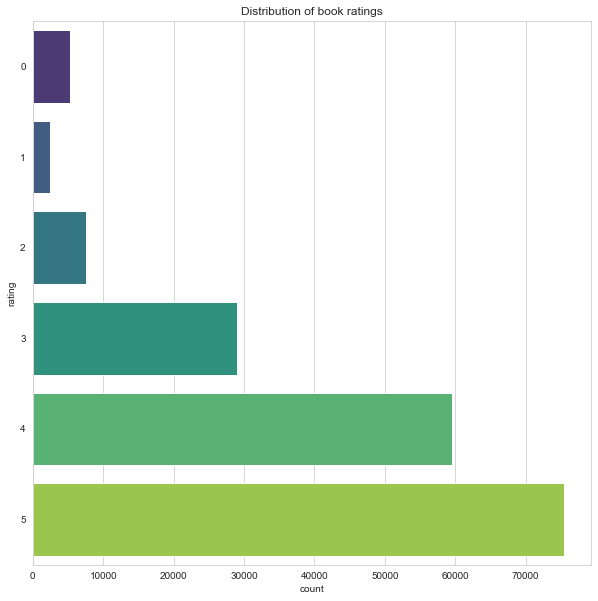

In [133]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
#plt.subplot(1,2,1)
ax = sns.countplot(y="rating", data=reviews1000, palette="viridis")
plt.title("Distribution of book ratings")

In [134]:
mean_rating = reviews1000.groupby('title')['rating'].agg(['count','mean'])
mean_rating
mean_rating.sort_values(['count'], ascending= False).head(10)

count      mean
title                                                              
The Giver (The Giver, #1)                            5754  4.013556
Wonder (Wonder #1)                                   4118  4.510928
Harry Potter and the Prisoner of Azkaban (Harry...   3937  4.599187
The Little Prince                                    2534  4.204815
The Bad Beginning (A Series of Unfortunate Even...   1795  3.772145
The Invention of Hugo Cabret                         1782  4.218855
Anne of Green Gables (Anne of Green Gables, #1)      1610  4.370807
The Giving Tree                                      1562  3.962228
The One and Only Ivan                                1456  4.397665
The Secret Garden                                    1382  4.130970

#### Reviews60

In [135]:
reviews60.rating.describe()

count    496634.000000
mean          3.862239
std           1.172741
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [136]:
reviews60.rating

0         5
1         5
2         4
3         5
4         5
         ..
496629    5
496630    5
496631    5
496632    5
496633    5
Name: rating, Length: 496634, dtype: int64

Text(0.5, 1.0, 'Distribution of book ratings in the complete dataset')

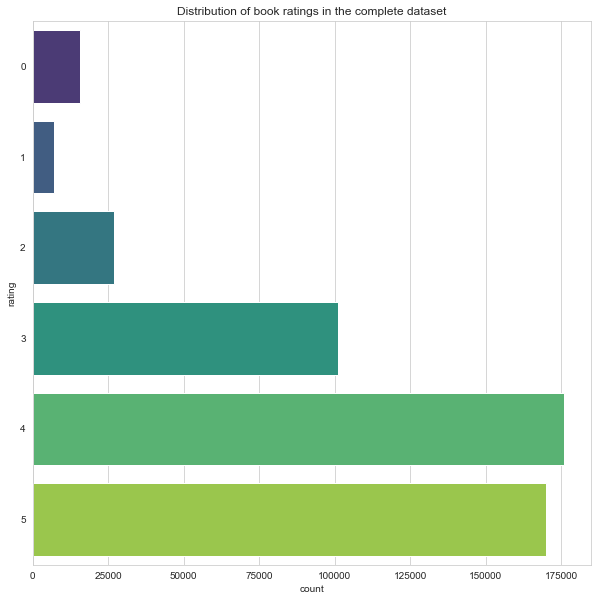

In [137]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
#plt.subplot(1,2,1)
ax = sns.countplot(y="rating", data=reviews60, palette="viridis" )
plt.title("Distribution of book ratings in the complete dataset")

In [138]:
ratings_perc=reviews60.rating.value_counts(normalize=True)

In [139]:
ratings_perc

4    0.354432
5    0.342467
3    0.203208
2    0.054092
0    0.031436
1    0.014365
Name: rating, dtype: float64

In [140]:
mean_rating60 = reviews60.groupby('title')['rating'].agg(['count','mean'])
mean_rating60.sort_values(['count'], ascending= False).head(10)

count      mean
title                                                              
The Giver (The Giver, #1)                            5754  4.013556
Wonder (Wonder #1)                                   4118  4.510928
Harry Potter and the Prisoner of Azkaban (Harry...   3937  4.599187
The Little Prince                                    2534  4.204815
The Bad Beginning (A Series of Unfortunate Even...   1795  3.772145
The Invention of Hugo Cabret                         1782  4.218855
Anne of Green Gables (Anne of Green Gables, #1)      1610  4.370807
The Giving Tree                                      1562  3.962228
The One and Only Ivan                                1456  4.397665
The Secret Garden                                    1382  4.130970

### REVIEWS BY UNIQUE USERS

#### Reviews1000

In [141]:
user_freq1000 =reviews1000[['user_id', 'review_id']].groupby('user_id').count().reset_index()
user_freq1000.columns = ['userId', 'n_reviews']
user_freq1000.sort_values(['n_reviews'], ascending= False)

userId  n_reviews
28912  8e7e5b546a63cb9add8431ee6914cf59        296
30826  97e2ce2141fa1c880967d78aec3c14fa        282
30472  964461db234739521f7b56a113aa1fdd        257
4699   16bcc03cb29d0950f52a897ceaf8eb6e        246
30082  9453d59ff8e823e93833af73969177c7        233
...                                 ...        ...
21986  6c261401fdaebee245a40632e60e35a7          1
21988  6c276b41ffcc9294438b67d7feea05c5          1
21992  6c2ba82c709900041e459b7a98c3d4ba          1
21994  6c2e178e34e0e5a077005f61ec1b2406          1
51808  ffffe38c3a89ad5122e17e4cb9997fe4          1

[51809 rows x 2 columns]

In [142]:
print("Mean number of reviews for a given user:",user_freq1000['n_reviews'].mean())

Mean number of reviews for a given user: 3.46119400104229


In [143]:
user_freq1000.n_reviews.describe().T

count    51809.000000
mean         3.461194
std          9.028368
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        296.000000
Name: n_reviews, dtype: float64

In [144]:
fig = px.strip(user_freq1000, x ='n_reviews')
fig.show()

#### Reviews60

In [145]:
user_freq60 =reviews60[['user_id', 'review_id']].groupby('user_id').count().reset_index()
user_freq60.columns = ['userId', 'n_reviews']
user_freq60.sort_values(['n_reviews'], ascending= False)

userId  n_reviews
38211  9003d274774f4c47e62f77600b08ac1d       3733
40287  97e2ce2141fa1c880967d78aec3c14fa       3219
31048  751efd615712748ea54bd36da6e521aa       2209
28377  6ac35fe952c608da50153d64f616291b       2206
28877  6cbfee0ca526f0b53e89b9d641c07d0e       1854
...                                 ...        ...
29968  70e8cf3bc11d4eb2370514619cc80613          1
29969  70eb5a06d5aa23ecc694850b980309a9          1
29970  70ecfd9e189b3c62914ce1d676710029          1
29972  70f0cdc8c3cbe1e9d570db62178322aa          1
67842  ffffe38c3a89ad5122e17e4cb9997fe4          1

[67843 rows x 2 columns]

In [146]:
print("Mean number of reviews for a given user:",user_freq60['n_reviews'].mean())

Mean number of reviews for a given user: 7.320342555606326


In [147]:
user_freq60.n_reviews.describe().T

count    67843.000000
mean         7.320343
std         46.217130
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       3733.000000
Name: n_reviews, dtype: float64

In [ ]:
#fig = px.strip(user_freq60, x ='n_reviews')
#fig.show()

### MOST COMMON WORDS IN THE REVIEWS BY AUTHOR GENDER

#### Preparing the review text

In [148]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,
    remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) #words --> 
    return text

In [149]:
# text preprocessing function
def text_preprocessing(text):
    """
    Cleaning and parsing the text.
    
    """
    from nltk.corpus import stopwords
    
    # Tokenize the text
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    # Lower case and remove punctuations
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    
    # Remove stopwords
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

In [150]:
# Uncomment the code below If you want to apply the function, it will take some time.
#reviews1000['reviews_clean'] = reviews1000['review_text'].apply(lambda x : text_preprocessing(x))

In [151]:
#I'm doing this step in order to avoid applying the preprocessing function. 
#This 'reviews1000words.csv file is already preprocessed.
reviews1000=pd.read_csv('reviews1000words.csv')

In [152]:
reviews1000.isnull().sum().sum()

37

In [153]:
reviews1000=reviews1000.dropna()

In [154]:
reviews1000.reviews_clean.str.replace(r'\d+','')

0                           spectacular book simply elegant
1                     best ya science fiction ive ever read
2         started reading giver thought would like many ...
3         reread book first time read middle school reme...
4              amazing story havent read yet humble opinion
                                ...                        
179316                 quite enchanting new moon still good
179317    reread one ill never love emily much love anne...
179318    emily grows faces new challenges anyone famili...
179319                                          living book
179320    favorite book entire series loved emily teddy ...
Name: reviews_clean, Length: 179284, dtype: object

In [155]:
reviews1000.shape

(179284, 25)

In [156]:
reviews1000.book_id.nunique()

1000

In [157]:
reviews1000.gender.value_counts()

male      94484
female    84800
Name: gender, dtype: int64

In [158]:
female=reviews1000[reviews1000.gender == 'female']
male=reviews1000[reviews1000.gender == 'male']

In [159]:
female_words = female['reviews_clean'].str.split(expand=True).unstack().value_counts()
male_words = male['reviews_clean'].str.split(expand=True).unstack().value_counts()

In [160]:
px.bar(female_words, x = female_words.index[:50],
      y = female_words.values[:50], 
       color = female_words.values[:50],
      title = 'Female authors - Top 50 word frequencies in the reviews',
      labels=dict(x='Words', y='Frequency')) # Give some label on the different axes

In [161]:
px.bar(male_words, x = male_words.index[:50],
      y = male_words.values[:50], 
       color = male_words.values[:50],
      title = 'Male authors - Top 50 word frequencies in the dataset',
      labels=dict(x='Words', y='Frequency')) # Give some label on the different axes

###  WordClouds to visualise most popular words in the reviews by author's gender

In [162]:
stop_words=stop_words = ["book",'read', 'story','one','books','would', 'reading', "time", 'child',"children",'childrens','reader','readers', 'kids', 'illustrations', 'first', 'also', 'even', 'way', 'series', 'get', 'many', 'know', 'still', 'things', 'young', 'could', 'make', 'though','I m', 'im', 'Im' 'get', 'reading'] + list(STOPWORDS)

In [163]:
female_=female['reviews_clean'].values
male_=male['reviews_clean'].values

In [164]:
female_

array(['spectacular book simply elegant',
       'best ya science fiction ive ever read',
       'started reading giver thought would like many people said book weird majority people talked said didnt like assumed wouldnt like either started reading could put book really got thinking really enjoyed helped think deeply involved book hard time thinking anything else would read book would read students would suggest book anyone',
       ...,
       'emily grows faces new challenges anyone familiar montgomerys anne green gables terribly surprised antics occur surprising pontification proper girls ought behave weve come long way baby book felt damn near archaic',
       'living book',
       'favorite book entire series loved emily teddy book ilse perry amusing first book lot like anne green gables one wasnt similar full emilys journal entries liked got know emily really sucked book think best whole series'],
      dtype=object)

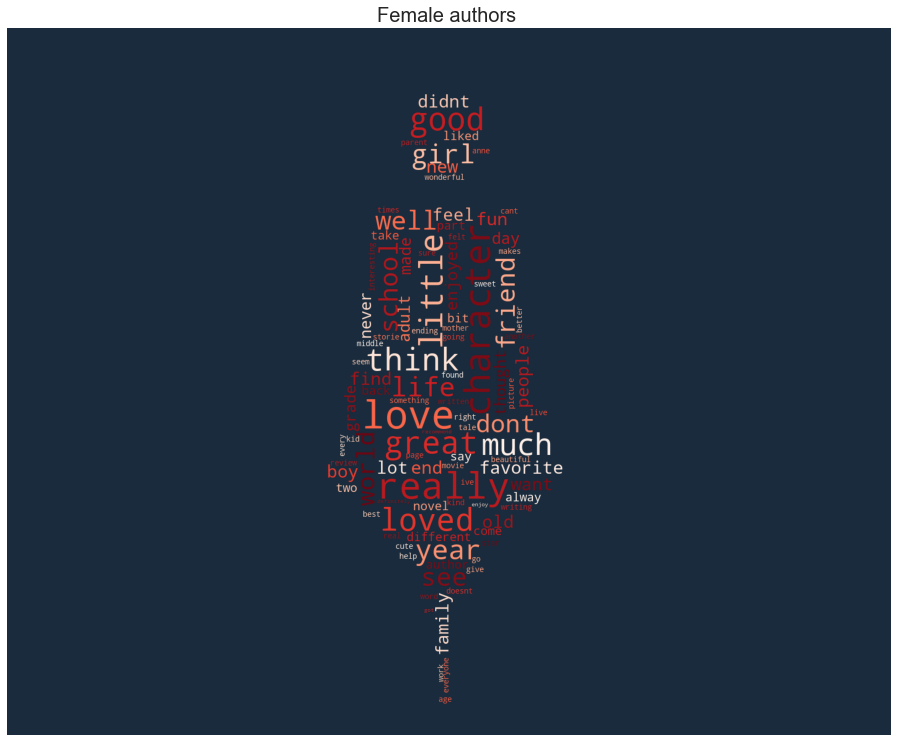

In [165]:
# The wordcloud of reviews of books written by female authors
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#132637", max_words=100, 
               mask=woman, 
               stopwords=stop_words, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(map(str,female_)))
plt.title("Female authors ", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Reds' , random_state=17), alpha=0.98)
plt.axis('off')
plt.savefig('9-jpeg')

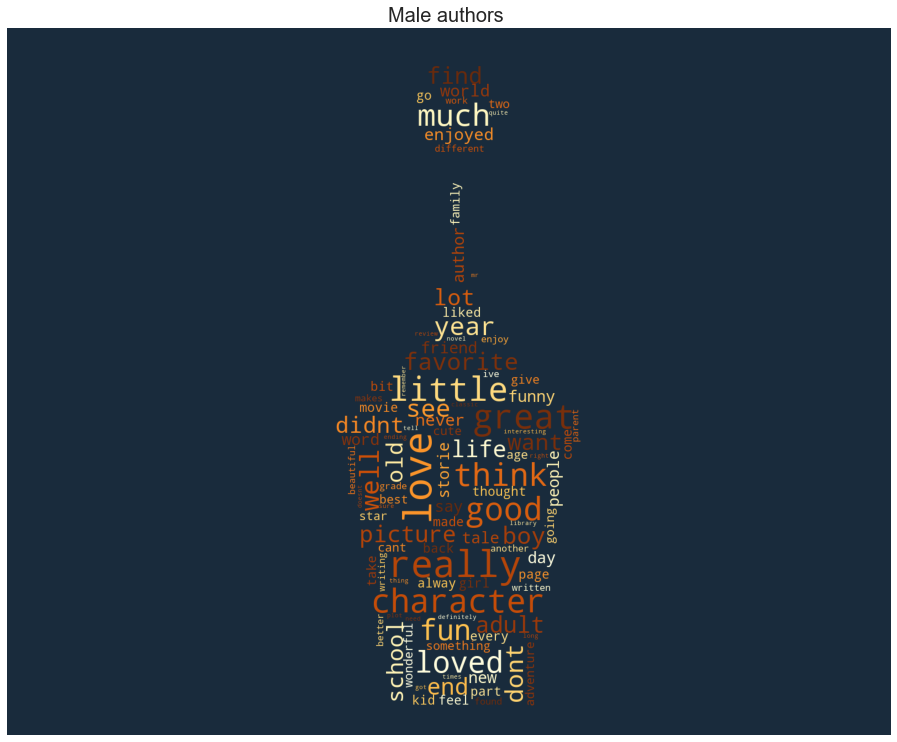

In [166]:
# The wordcloud of male authors
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#132637", max_words=100, 
               mask=man,
               stopwords=stop_words, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(male_))
plt.title("Male authors ", fontsize=20)
plt.imshow(wc.recolor( colormap= 'YlOrBr' , random_state=17), alpha=0.98)
plt.axis('off')
plt.savefig('10-jpeg')

### SENTIMENT ANALYSIS OF THE REVIEWS BY GENDER

In [167]:
# load the SentimentIntensityAnalyser object in
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [168]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

#### Female authors reviews

female.to_csv('Female_sentiment.csv', index=False)

In [169]:
femalesent = pd.read_csv('Female_sentiment.csv')

In [170]:
femalesent

user_id  book_id  \
0      b10fe6b69d79b31aea00153d46fd16c5     3636   
1      39d0410410b2af134b3dcc66f7a21f5f     3636   
2      02a401f76c4cb789b41a03c86aba8333     3636   
3      1d4f47fc8b9c55a2b4b44a32a4243ac3     3636   
4      5a523710c0149002f362a4079e3bb0d8     3636   
...                                 ...      ...   
84795  22c04a90f9f1a07ae7430f7532809b5e   773514   
84796  d4c4307716f1d8b830b1d65721c8271b   773514   
84797  77f54d8a2e3fdfc29490dc4a2ce190fe   773514   
84798  4d6916687c3f0cd35ef50ade3e837493   773514   
84799  9b702a7009c7ed63426c63b164a431a2   773514   

                              review_id  rating  \
0      82574e06eb02f3ccb1cc2423d4276938       5   
1      da1fadd6ce53c0ab01bcbd1d58c010d9       5   
2      ff2f2796810b34be15a4cd6adcdf1504       4   
3      20d31eb9a3c111b19a34b5f551a3bdf5       5   
4      87d86bd9ffcac3b0b0174b308c43cc3d       5   
...                                 ...     ...   
84795  a4d2fa09286bc955ee56c408095765d1       4   
84796  a70d92041fc2f250062a105948d7e380       4   
84797  b64197ab5adbf02dc5822ff15adbb7c9       3   
84798  41822ddf3d9e04383ab4557d9361caa1       0   
84799  959b66e7c62cb2f1e356117f489ba7b8       4   

                                             review_text        isbn  \
0             SPECTACULAR! This book is simply elegant:)  0385732554   
1            The best YA science fiction I've ever read!  0385732554   
2      Before I started reading the Giver I thought I...  0385732554   
3      I just re-read this book. The first time I rea...  0385732554   
4      Amazing story. If you haven't read this yet, y...  0385732554   
...                                                  ...         ...   
84795  Now quite as enchanting as New Moon, but still...  0553262149   
84796  Just re-read this one. While I'll never love E...  0553262149   
84797  Emily grows up and faces some new challenges. ...  0553262149   
84798                              living with this book  0553262149   
84799  This was my favorite book of the entire series...  0553262149   

       text_reviews_count  is_ebook  average_rating  \
0                   49850     False            4.12   
1                   49850     False            4.12   
2                   49850     False            4.12   
3                   49850     False            4.12   
4                   49850     False            4.12   
...                   ...       ...             ...   
84795                 331     False            4.14   
84796                 331     False            4.14   
84797                 331     False            4.14   
84798                 331     False            4.14   
84799                 331     False            4.14   

                                             description     format publisher  \
0      Twelve-year-old Jonas lives in a seemingly ide...  Paperback     Ember   
1      Twelve-year-old Jonas lives in a seemingly ide...  Paperback     Ember   
2      Twelve-year-old Jonas lives in a seemingly ide...  Paperback     Ember   
3      Twelve-year-old Jonas lives in a seemingly ide...  Paperback     Ember   
4      Twelve-year-old Jonas lives in a seemingly ide...  Paperback     Ember   
...                                                  ...        ...       ...   
84795  Emily Starr was born with the desire to write....  Paperback  Starfire   
84796  Emily Starr was born with the desire to write....  Paperback  Starfire   
84797  Emily Starr was born with the desire to write....  Paperback  Starfire   
84798  Emily Starr was born with the desire to write....  Paperback  Starfire   
84799  Emily Starr was born with the desire to write....  Paperback  Starfire   

       num_pages         isbn13  publication_year  ratings_count  \
0          208.0  9780385732550              2006        1311422   
1          208.0  9780385732550              2006        1311422   
2          208.0  9780385732550              2006        1311422   
3          208.0  97803

In [171]:
femalesent.shape

(84800, 29)

In [172]:
femalesent.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'isbn',
       'text_reviews_count', 'is_ebook', 'average_rating', 'description',
       'format', 'publisher', 'num_pages', 'isbn13', 'publication_year',
       'ratings_count', 'title', 'descriptiondetect', 'titledetect',
       'review_text_detect', 'author', 'first_name', 'gender', 'probability',
       'reviews_clean', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos',
       'sentiment_compound'],
      dtype='object')

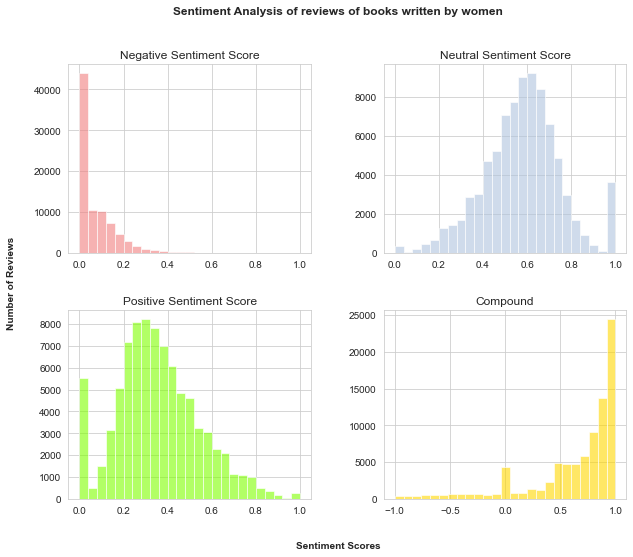

In [173]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
femalesent.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', 
        alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')

femalesent.hist('sentiment_neu', bins=25, ax=axes[0,1], 
        color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')

femalesent.hist('sentiment_pos', bins=25, ax=axes[1,0], 
        color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')

femalesent.hist('sentiment_compound', bins=25, ax=axes[1,1],
        color='gold', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of reviews of books written by women\n\n', fontsize=12, fontweight='bold');

In [174]:
# full female dataframe with POSITIVE comments
fem_pos = femalesent.loc[femalesent.sentiment_compound >= 0.95]
fem_pos
# only corpus of POSITIVE comments
pos_fem_ = fem_pos['reviews_clean'].tolist()
pos_fem =female['reviews_clean'].values

In [175]:
pos_fem_

['couldnt put book simple fact wanted know author chose ending honest ending disappointed little really great read apart lean definitely five stars four stars enough let five ideas book new similar dystopian books like yevgeny zamyatin id read years wasnt earth shattering though may probably someone else hasnt read book like great book accessible young readers well feat many classics pull communicates message remaining interesting relevant gripping average reader takes concept exploring importance memory humanssocieties develops easily digestible thought provoking way good read overall',
 'seen book lying around different places many years going back grade years elementary school guess never really interest picking diving shame didnt sooner incredible book happened see copy laying teachers desk middle school observing decided pick read first chapter next enthralled main character jonas lives community sameness everybody raised things governed strict rules step line use old longer wish 

In [176]:
# full dataframe with NEGATIVE comments
fem_neg = femalesent.loc[femalesent.sentiment_compound < -0.05]

# only corpus of NEGATIVE comments
neg_fem_ = fem_neg['reviews_clean'].tolist()
neg_fem = fem_neg['reviews_clean'].values

In [177]:
POSITIVE = np.array(Image.open('../GIT/PROJECT 1 BOOK RECOMMENDER/masks/POSITIVE.jpg'))
NEGATIVE = np.array(Image.open('../GIT/PROJECT 1 BOOK RECOMMENDER/masks/NEGATIVE.jpg'))

In [178]:
stop_words2=stop_words=stop_words = ["book",'read', 'story','one','books','would', 'reading', "time", 'child',"children",'childrens','reader','readers', 'kids', 'illustrations', 'first', 'also', 'even', 'way', 'series', 'get', 'many', 'know', 'still', 'things', 'young', 'could', 'make', 'though','I m', 'im', 'Im' 'get', 'reading', 'really', 'like', 'love', 'great', 'good', 'loved', 'think', 'characters', 'little'] + list(STOPWORDS)

In [179]:
pos_fem

array(['spectacular book simply elegant',
       'best ya science fiction ive ever read',
       'started reading giver thought would like many people said book weird majority people talked said didnt like assumed wouldnt like either started reading could put book really got thinking really enjoyed helped think deeply involved book hard time thinking anything else would read book would read students would suggest book anyone',
       ...,
       'emily grows faces new challenges anyone familiar montgomerys anne green gables terribly surprised antics occur surprising pontification proper girls ought behave weve come long way baby book felt damn near archaic',
       'living book',
       'favorite book entire series loved emily teddy book ilse perry amusing first book lot like anne green gables one wasnt similar full emilys journal entries liked got know emily really sucked book think best whole series'],
      dtype=object)

In [180]:
neg_fem

array(['absolutely hated deceive book cant stand context treat babies community utopia fake good bad must balanced guess could realistic wish could entertaining annoying',
       'dystopian fiction middle school set bad book much better genre',
       'im sure im supposed feel book first reason took movie trailer tempted thought dystopian action packed young adult think bear mind havent watch movie book proves lot better expected sober book life box grey prison person knows truth set main character jonas confusion unfair yo mind book cruel setting ignorant unrepentant human could instead facing truth working past rather subject unsuspecting mind let carry weight world atlas much huh people claim book bore hell doesnt understand stamped hundreds question marks try looking way way book bores exactly frustrates jonas gray world wrong tasteless felt horrible people deemed live synchronized wonderful dystopianhappy world perfect enough methodical killing horrifies jonas couldnt understand f

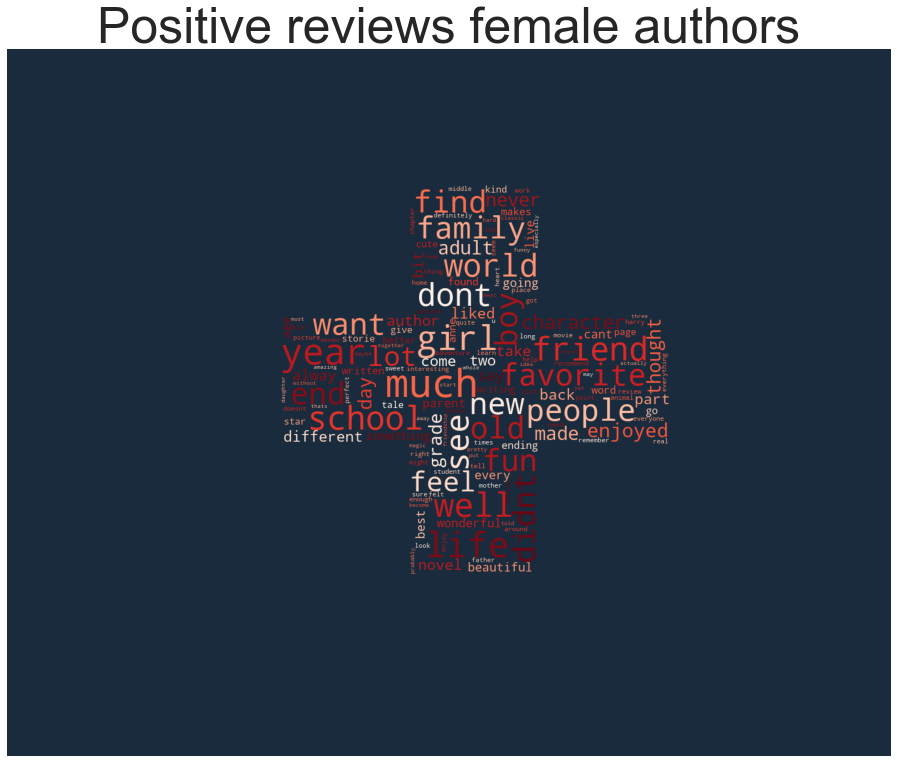

In [181]:
# The wordcloud of positive reviews of books written by female authors
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#132637", max_words=150, 
               mask=POSITIVE, 
               stopwords=stop_words2, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(map(str,pos_fem)))
plt.title("Positive reviews female authors", fontsize=50)
plt.imshow(wc.recolor( colormap= 'Reds' , random_state=17), alpha=0.98)
plt.axis('off')
plt.savefig('11-jpeg')

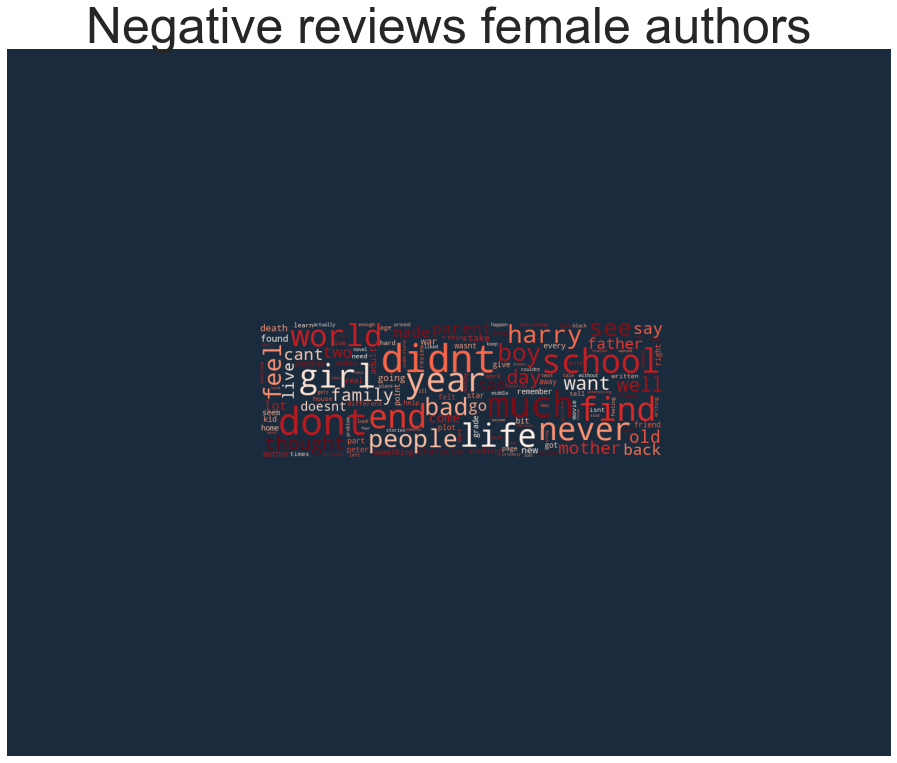

In [182]:
# The wordcloud of tive reviews of books written by female authors
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#132637", max_words=150, 
               mask=NEGATIVE, 
               stopwords=stop_words2, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(map(str,neg_fem)))
plt.title("Negative reviews female authors", fontsize=50)
plt.imshow(wc.recolor( colormap= 'Reds' , random_state=17), alpha=0.98)
plt.axis('off')
plt.savefig('12-jpeg')

In [184]:
femalesent[femalesent.sentiment_compound < -0.05].review_text.sample(3).tolist()

['Eh. Sad book. See it everyday in school. I was expecting more in it!',
 "Didn't realise this was a series - makes me less irritated with the cliffhanger 'make of it what you will' ending.",
 'More craziness arrives when the cat returns.']

#### Male authors reviews

In [185]:
malesent = pd.read_csv('Male_sentiment.csv')

In [186]:
malesent.shape

(94484, 29)

In [187]:
malesent.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text', 'isbn',
       'text_reviews_count', 'is_ebook', 'average_rating', 'description',
       'format', 'publisher', 'num_pages', 'isbn13', 'publication_year',
       'ratings_count', 'title', 'descriptiondetect', 'titledetect',
       'review_text_detect', 'author', 'first_name', 'gender', 'probability',
       'reviews_clean', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos',
       'sentiment_compound'],
      dtype='object')

In [188]:
malesent['sentiment_compound'].value_counts()

 0.0000    4997
 0.4588    1810
 0.6369    1586
 0.4404    1384
 0.5994    1383
           ... 
 0.5995       1
-0.5716       1
-0.8394       1
 0.3666       1
-0.5829       1
Name: sentiment_compound, Length: 7782, dtype: int64

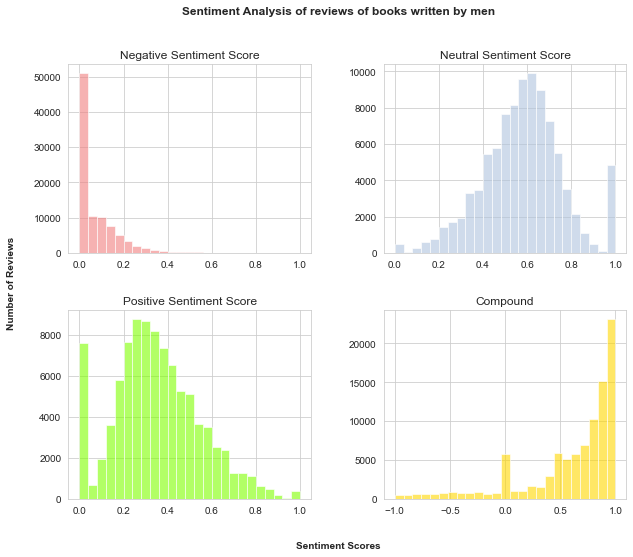

In [189]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
malesent.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', 
        alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')

malesent.hist('sentiment_neu', bins=25, ax=axes[0,1], 
        color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')

malesent.hist('sentiment_pos', bins=25, ax=axes[1,0], 
        color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')

malesent.hist('sentiment_compound', bins=25, ax=axes[1,1],
        color='gold', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of reviews of books written by men\n\n', fontsize=12, fontweight='bold');

In [190]:
# full male dataframe with POSITIVE comments
male_pos = malesent.loc[malesent.sentiment_compound >= 0.95]
male_pos
# only corpus of POSITIVE comments
pos_male = male_pos['reviews_clean'].tolist()
pos_male

['tag line eyes blind look heart classic would give five stars haunting suspicion sort selfimportant philosophical musing may already cliche time written kind irritating appeal mimes like marcel marceau french love want strangle certainly moments soaring poetry traveling planets see grownups live one feels pettiness consider adult tokens respect time romanticizes childhood way disservice children adults thus perpetuating sort myths childhood imagination ie children infinite creativity adults none society generally erroneously adores ironic given great extent charm story lies apparent influence schrodinger adult character prince supposedly quintessential child oddly enough current reading aspect find intriguing princes mode transport hinted fully explained towards end pulley groaned way old weather vane groans wind asleep long time hear said little prince weve awakened well singing',
 'book one best books ive read life wisdom fox something often forget fall trap busy begin take importan

In [191]:
# full male dataframe with NEGATIVE comments
male_neg = malesent.loc[malesent.sentiment_compound < -0.05]

# only corpus of NEGATIVE comments
neg_male = male_neg['reviews_clean'].tolist()
neg_male

['spoiler alert im touched unfortunately parts dont get point recently ive watched movie',
 'maybe stupid understand writer talking',
 'ingin tahu petualang dan peduli terjadap halhal kecil yang sering diabaikan orang dewasa begitulah buku ini menggambarkan petualangan little prince menarik dengan gaya penceritaan unik suka penggalan di bawah ini men stars answered things different people travelers stars guides others little lights sky others scholars problems businessman wealth stars silent alone stars one else page',
 'apart bible deepest book ever read class school little prince included school program till recent years seemed senseless get world adults face difficulties little prince book helped look aside get lessons lead life path',
 'ive wanted read even read didnt chance read show',
 'book subject many interpretations think mean say worldly lifestyle wrong live like monks think takes childs perspective remind us relationships whether businessman customers man authority subjects

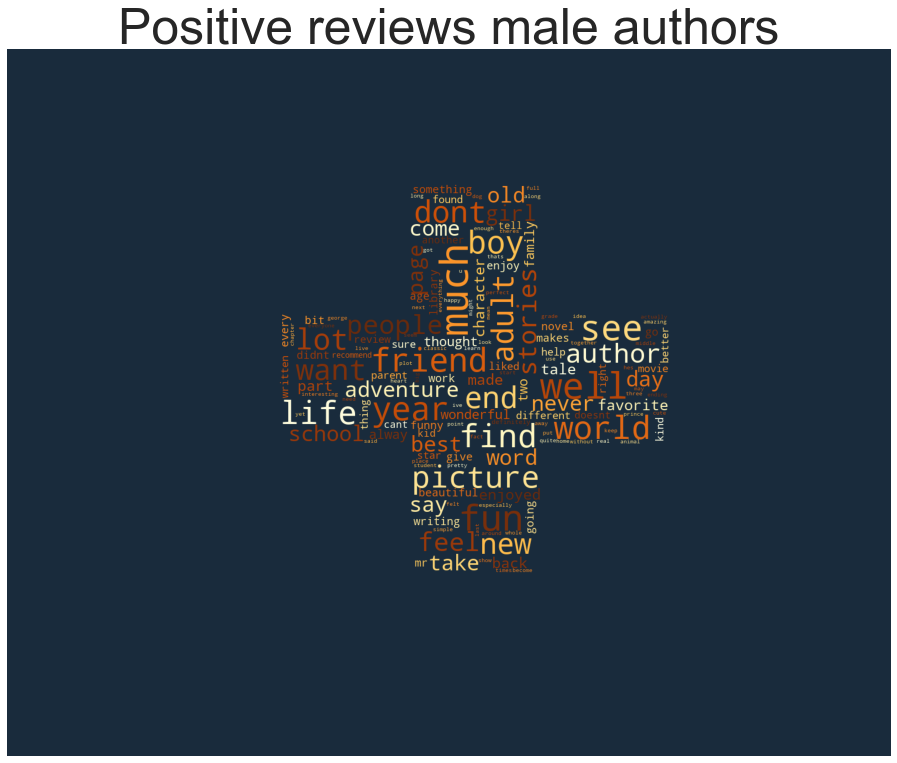

In [192]:
# The wordcloud of positive reviews of books written by male authors
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#132637", max_words=150, 
               mask=POSITIVE, 
               stopwords=stop_words2, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(map(str,pos_male)))
plt.title("Positive reviews male authors", fontsize=50)
plt.imshow(wc.recolor( colormap= 'YlOrBr' , random_state=17), alpha=0.98)
plt.axis('off')
plt.savefig('13-jpeg')

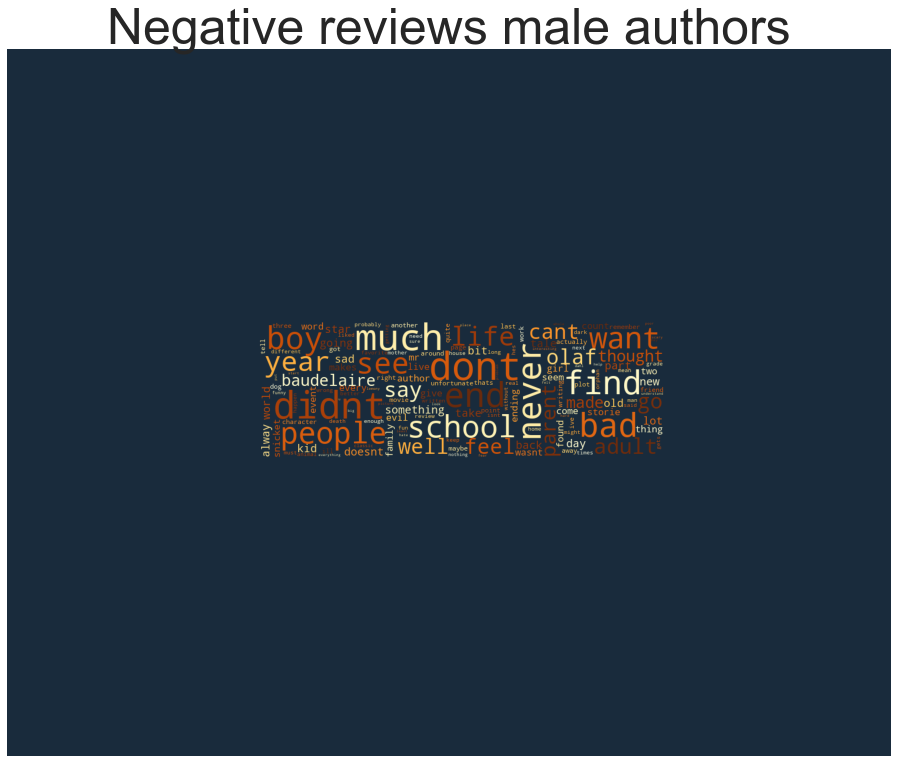

In [193]:
# The wordcloud of negative reviews of books written by male authors
plt.figure(figsize=(16,13))

wc = WordCloud(background_color="#132637", max_words=150, 
               mask=NEGATIVE, 
               stopwords=stop_words2, 
               collocations= False, max_font_size= 70)

wc.generate(" ".join(map(str,neg_male)))
plt.title("Negative reviews male authors", fontsize=50)
plt.imshow(wc.recolor( colormap= 'YlOrBr' , random_state=24), alpha=0.98)
plt.axis('off')
plt.savefig('14-jpeg')

In [194]:
malesent[malesent.sentiment_compound >= 0.95].review_text.sample(3).tolist()

["I first read this book when I was 12 and absolutely loved it. It's a great adventure story with sci-fi elements, but it's mostly a story about friendship. The series just gets better with the City of Gold and Lead and The Pool of Fire. Great stories.",
 'I love dogs and I love reading, so naturally I will love this book. I can already tell. And I was right, I do love this book. I want to read it to my dogs, and kids, mostly kids.',
 "Middle-schooler Greg Heffley records his efforts to avoid bullies, impress girls, and play video games in Diary of a Wimpy Kid--the first book in the popular series. Written like a journal with illustrations making up around twenty percent of the page space, the book is friendly to the reluctant reader (middle-school boys, especially) both in format and content. Humorous and episodic, the book introduces Greg and his family--notably his older, heavy-metal playing brother Roderick and his embarrassing little brother Manny--and recounts many schemes for po

In [195]:
malesent[malesent.sentiment_compound < -0.05].review_text.sample(3).tolist()

['This is one of the books that I probably checked out from the library as a child twelve times. I\'m too weary to make a rating now, seeing how many negative reviews there are, but this was one of my favorites. I also thought the "momento" was a Mento, but you live and you learn.',
 'Picked this up and read it in the store. I thought it was overplayed..there are other books from the same author about the same theme. should change it up a bit. kinda idiotic to me, my overall feel on it. I did like the illustrations though.',
 'My least favorite out of the first 3 books...']

# Creating dataframes summing up the reviews for the recommendation system

In [196]:
reviews1000

user_id  book_id  \
0       b10fe6b69d79b31aea00153d46fd16c5     3636   
1       39d0410410b2af134b3dcc66f7a21f5f     3636   
2       02a401f76c4cb789b41a03c86aba8333     3636   
3       1d4f47fc8b9c55a2b4b44a32a4243ac3     3636   
4       5a523710c0149002f362a4079e3bb0d8     3636   
...                                  ...      ...   
179316  22c04a90f9f1a07ae7430f7532809b5e   773514   
179317  d4c4307716f1d8b830b1d65721c8271b   773514   
179318  77f54d8a2e3fdfc29490dc4a2ce190fe   773514   
179319  4d6916687c3f0cd35ef50ade3e837493   773514   
179320  9b702a7009c7ed63426c63b164a431a2   773514   

                               review_id  rating  \
0       82574e06eb02f3ccb1cc2423d4276938       5   
1       da1fadd6ce53c0ab01bcbd1d58c010d9       5   
2       ff2f2796810b34be15a4cd6adcdf1504       4   
3       20d31eb9a3c111b19a34b5f551a3bdf5       5   
4       87d86bd9ffcac3b0b0174b308c43cc3d       5   
...                                  ...     ...   
179316  a4d2fa09286bc955ee56c408095765d1       4   
179317  a70d92041fc2f250062a105948d7e380       4   
179318  b64197ab5adbf02dc5822ff15adbb7c9       3   
179319  41822ddf3d9e04383ab4557d9361caa1       0   
179320  959b66e7c62cb2f1e356117f489ba7b8       4   

                                              review_text        isbn  \
0              SPECTACULAR! This book is simply elegant:)  0385732554   
1             The best YA science fiction I've ever read!  0385732554   
2       Before I started reading the Giver I thought I...  0385732554   
3       I just re-read this book. The first time I rea...  0385732554   
4       Amazing story. If you haven't read this yet, y...  0385732554   
...                                                   ...         ...   
179316  Now quite as enchanting as New Moon, but still...  0553262149   
179317  Just re-read this one. While I'll never love E...  0553262149   
179318  Emily grows up and faces some new challenges. ...  0553262149   
179319                              living with this book  0553262149   
179320  This was my favorite book of the entire series...  0553262149   

        text_reviews_count  is_ebook  average_rating  \
0                    49850     False            4.12   
1                    49850     False            4.12   
2                    49850     False            4.12   
3                    49850     False            4.12   
4                    49850     False            4.12   
...                    ...       ...             ...   
179316                 331     False            4.14   
179317                 331     False            4.14   
179318                 331     False            4.14   
179319                 331     False            4.14   
179320                 331     False            4.14   

                                              description     format  \
0       Twelve-year-old Jonas lives in a seemingly ide...  Paperback   
1       Twelve-year-old Jonas lives in a seemingly ide...  Paperback   
2       Twelve-year-old Jonas lives in a seemingly ide...  Paperback   
3       Twelve-year-old Jonas lives in a seemingly ide...  Paperback   
4       Twelve-year-old Jonas lives in a seemingly ide...  Paperback   
...                                                   ...        ...   
179316  Emily Starr was born with the desire to write....  Paperback   
179317  Emily Starr was born with the desire to write....  Paperback   
179318  Emily Starr was born with the desire to write....  Paperback   
179319  Emily Starr was born with the desire to write....  Paperback   
179320  Emily Starr was born with the desire to write....  Paperback   

       publisher  num_pages         isbn13  publication_year  ratings_count  \
0          Ember      208.0  9780385732550              2006        1311422   
1          Ember      208.0  9780385732550              2006        1311422   
2          Ember      208.0  9780385732550              2006        1311422   
3          Ember      208.0  97803857325

In [197]:
justreviews=reviews1000[['title', 'book_id','reviews_clean']].copy()

In [198]:
justreviews

title  book_id  \
0       The Giver (The Giver, #1)     3636   
1       The Giver (The Giver, #1)     3636   
2       The Giver (The Giver, #1)     3636   
3       The Giver (The Giver, #1)     3636   
4       The Giver (The Giver, #1)     3636   
...                           ...      ...   
179316   Emily Climbs (Emily, #2)   773514   
179317   Emily Climbs (Emily, #2)   773514   
179318   Emily Climbs (Emily, #2)   773514   
179319   Emily Climbs (Emily, #2)   773514   
179320   Emily Climbs (Emily, #2)   773514   

                                            reviews_clean  
0                         spectacular book simply elegant  
1                   best ya science fiction ive ever read  
2       started reading giver thought would like many ...  
3       reread book first time read middle school reme...  
4            amazing story havent read yet humble opinion  
...                                                   ...  
179316               quite enchanting new moon still good  
179317  reread one ill never love emily much love anne...  
179318  emily grows faces new challenges anyone famili...  
179319                                        living book  
179320  favorite book entire series loved emily teddy ...  

[179284 rows x 3 columns]

In [199]:
sum_reviews1000 = justreviews.groupby(['title', 'book_id']).agg({'reviews_clean': 'sum'})

In [200]:
sum_reviews1000

reviews_clean
title                                             book_id                                                    
11 Birthdays (Willow Falls, #1)                   4835838   kids like old memes themes adults jeremy fink ...
14 Cows for America                               6536509   original circumstances individuals book based ...
365 Days of Wonder: Mr. Browne's Book of Precepts 20758093  cute book full inspirational quotesquick read ...
A Bad Case of Stripes                             474858    book tc class picked book enjoyed childbook vi...
A Ball for Daisy                                  9703979   wordless picture book depicts story dog reciev...
...                                                                                                       ...
Zathura                                           55749     really like chris van allsburg truth told howe...
Zen Shorts                                        140181    beautifully illustrated book children includes...
Zombie in Love                                    7172082   poor mortimer lonesome zombie looking love tri...
Zoobreak (Swindle, #2)                            6620483   listened book audio boys obsessed gordon korma...
Zoom                                              78991     feel funny assigning label read bookinterestin...

[1000 rows x 1 columns]

In [201]:
reviews1000_for_recommender =sum_reviews1000.reset_index()

In [202]:
reviewsdescriptions=reviews1000[['title', 'book_id','descriptiondetect','reviews_clean']].copy()

In [203]:
reviewsdescriptions

title  book_id  \
0       The Giver (The Giver, #1)     3636   
1       The Giver (The Giver, #1)     3636   
2       The Giver (The Giver, #1)     3636   
3       The Giver (The Giver, #1)     3636   
4       The Giver (The Giver, #1)     3636   
...                           ...      ...   
179316   Emily Climbs (Emily, #2)   773514   
179317   Emily Climbs (Emily, #2)   773514   
179318   Emily Climbs (Emily, #2)   773514   
179319   Emily Climbs (Emily, #2)   773514   
179320   Emily Climbs (Emily, #2)   773514   

                                        descriptiondetect  \
0       twelve-year-old jonas lives in a seemingly ide...   
1       twelve-year-old jonas lives in a seemingly ide...   
2       twelve-year-old jonas lives in a seemingly ide...   
3       twelve-year-old jonas lives in a seemingly ide...   
4       twelve-year-old jonas lives in a seemingly ide...   
...                                                   ...   
179316  emily starr was born with the desire to write....   
179317  emily starr was born with the desire to write....   
179318  emily starr was born with the desire to write....   
179319  emily starr was born with the desire to write....   
179320  emily starr was born with the desire to write....   

                                            reviews_clean  
0                         spectacular book simply elegant  
1                   best ya science fiction ive ever read  
2       started reading giver thought would like many ...  
3       reread book first time read middle school reme...  
4            amazing story havent read yet humble opinion  
...                                                   ...  
179316               quite enchanting new moon still good  
179317  reread one ill never love emily much love anne...  
179318  emily grows faces new challenges anyone famili...  
179319                                        living book  
179320  favorite book entire series loved emily teddy ...  

[179284 rows x 4 columns]

In [204]:
sum_reviewsdescriptions1000 = reviewsdescriptions.groupby(['title', 'book_id','descriptiondetect']).agg({'reviews_clean': 'sum'})

In [205]:
sum_reviewsdescriptions1000.head(3)

reviews_clean
title                                             book_id  descriptiondetect                                                                                    
11 Birthdays (Willow Falls, #1)                   4835838  groundhog day meets flipped in this tale of a g...  kids like old memes themes adults jeremy fink ...
14 Cows for America                               6536509  in june of 2002, a ceremony begins in a village...  original circumstances individuals book based ...
365 Days of Wonder: Mr. Browne's Book of Precepts 20758093 in the #1 new york timesbestselling novel wonde...  cute book full inspirational quotesquick read ...

In [206]:
reviewsdescriptions1000 =sum_reviewsdescriptions1000.reset_index()

In [207]:
reviewsdescriptions1000.columns

Index(['title', 'book_id', 'descriptiondetect', 'reviews_clean'], dtype='object')

In [208]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,
    remove links,remove punctuation
    and remove words containing numbers.'''
    
    #text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) #words --> 
    return text

In [209]:
# text preprocessing function
def text_preprocessing(text):
    """
    Cleaning and parsing the text.
    
    """
    from nltk.corpus import stopwords
    
    # Tokenize the text
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    # Lower case and remove punctuations
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    
    # Remove stopwords
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

In [210]:
reviewsdescriptions1000['description_clean'] = reviewsdescriptions1000['descriptiondetect'].apply(lambda x : text_preprocessing(x))

In [211]:
reviewsdescriptions1000.to_csv('reviewsdescriptions1000_for_recommender.csv', index= False)

In [212]:
#In case you want to try them later separately
reviews1000_for_recommender.to_csv('reviews1000_for_recommender.csv', index= False)